<h1><center>CHOCOLATE RATING PROJECT</center></h1>



        


In [ ]:
Note: Installation Requirements

    Spacy: (for Named Entity Recognition for pre processing specific_bean_origin)
        pip install spacy
        python -m spacy download en_core_web_sm
    
    Plotly: (for mapping chocolate ratings across geographical location)
        pip install plotly

# Task 1:  Data Pre-Processing:
    
    
    
    
###  Reading the file chocolate.csv into dataframe "chocs"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

chocs=pd.read_csv('chocolate.csv')

In [2]:
chocs.head(10) #To print the first 10 rows

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
5,Salgado,Rio Arriba,292,2008,70%,Argentina,3.50,Forastero (Arriba) ASSS,Ecuador
6,Cacao Store,Madagascar,1684,2015,70%,Japan,3.00,Trinitario,Madagascar
7,Kaoka (Cemoi),Noir,404,2009,70%,France,2.75,,
8,Woodblock,Gran Couva,1042,2013,70%,U.S.A.,3.50,Trinitario,Trinidad
9,Dormouse,"Colombia, Batch 9",1676,2015,80%,U.K.,2.75,"Criollo, Trinitario",Colombia


In [3]:
chocs.tail(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1490,Zokoko,Alto Beni,697,2011,68%,Australia,3.50,,Bolivia
1491,Madre,Guadalcanal,1940,2017,73%,U.S.A.,3.50,,Solomon Islands
1492,Dormouse,"Madagascar, Batch 8",1676,2015,77%,U.K.,2.75,"Criollo, Trinitario",Madagascar
1493,Marana,Piura,1872,2016,70%,Peru,3.00,,Peru
1494,Amedei,Nine,111,2007,75%,Italy,4.00,Blend,
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela
1499,Hotel Chocolat,"Pepiniere, single Cote",1654,2015,70%,U.K.,2.75,,St. Lucia


In [4]:
chocs.columns #Columns present in chocs dataframe

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

### Renaming the column names:

In [5]:
#Renaming Column Names AS PER ASSIGNMENT SPECIFICATIONS

oldcols = chocs.columns

newcols = ['company', 'specific_bean_origin', 'ref', 'review_year', 'cocoa_percentage', 
           'company_location', 'rating', 'bean_type', 'broad_bean_origin']

chocs = chocs.rename(columns = dict(zip(oldcols, newcols)))

In [6]:
chocs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               1500 non-null   object 
 1   specific_bean_origin  1500 non-null   object 
 2   ref                   1500 non-null   int64  
 3   review_year           1500 non-null   int64  
 4   cocoa_percentage      1500 non-null   object 
 5   company_location      1500 non-null   object 
 6   rating                1500 non-null   float64
 7   bean_type             1499 non-null   object 
 8   broad_bean_origin     1499 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 105.6+ KB


####  It can be noted that:
    i) 1 null value in Bean
    ii) 1 null value in Broad Bean
    iii) cocoa_percentage is object type but should be numeric type

### Cocoa_percentage column is cleaned, values changed to float64 from object type


In [7]:


chocs['cocoa_percentage']=chocs['cocoa_percentage'].str.replace('%','') #removing the percentage sign
chocs[["cocoa_percentage"]] = chocs[["cocoa_percentage"]].astype("float64") #changing to float 
chocs


,company,specific_bean_origin,ref,review_year,cocoa_percentage,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,64.0,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80.0,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70.0,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70.0,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65.0,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70.0,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58.0,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64.0,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72.0,U.K.,3.50,,Venezuela


###  Final Observations: There are 4 numeric columns:
    i) ref: min=5, max=1952
    
    ii) review_year: min= 2006, max= 2017
    
    iii) rating: 1 to 5 Mean Rating: 3.18
    
    iv) cocoa_percentage: min 42 max 100 avg 71.58

### Numerical columns:

In [8]:
chocs.describe()

,ref,review_year,cocoa_percentage,rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,1036.881333,2012.326000,71.564000,3.183167
std,554.693828,2.933734,6.264375,0.484319
min,5.000000,2006.000000,42.000000,1.000000
25%,572.000000,2010.000000,70.000000,2.750000
50%,1071.000000,2013.000000,70.000000,3.250000
75%,1503.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


###  Categorical columns:

In [9]:
chocs.describe(include=[object])

,company,specific_bean_origin,company_location,bean_type,broad_bean_origin
count,1500,1500,1500,1499,1499
unique,391,893,57,36,93
top,Soma,Madagascar,U.S.A.,,Venezuela
freq,39,42,632,750,174


## Cleaning Individual Columns

### A. Cleaning Categorical Column 1: "company"

In [10]:
chocs['company'].sort_values().unique()

array(['A. Morin', 'AMMA', 'Acalli', 'Adi', 'Aequare (Gianduja)',
       'Ah Cacao', "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'Anahata', 'Ara', 'Arete',
       'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Askinosie', 'Bahen & Co.', 'Bakau', 'Bar Au Chocolat',
       "Baravelli's", 'Batch', 'Beau Cacao', 'Beehive', 'Belcolade',
       'Bellflower', 'Belyzium', 'Benoit Nihant', 'Beschle (Felchlin)',
       'Bisou', 'Bittersweet Origins', 'Black Mountain', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Bright', 'Britarev',
       'Bronx Grrl Chocolate', 'Burnt Fork Bend', 'C-Amaro',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao Hunters',
       'Cacao Market', 'Cacao Prieto', 'Cacao Sampaka', 'Cacao Store',
       'Cacao de Origen', 'Cacaoyere (Ecua

In [11]:
#THERE ARE 391 TYPES OF CHOCOLATE COMPANIES OR BRANDS

chocs['company'].value_counts()

Soma             39
Bonnat           23
Fresco           21
Pralus           20
A. Morin         19
                 ..
Dulcinea          1
Timo A. Meyer     1
Metropolitan      1
Choco Del Sol     1
Nanea             1
Name: company, Length: 391, dtype: int64

In [12]:
#PRINTING THE NAMES IN ALPHABETICAL ORDER TO SPOT TYPOS

arr=chocs['company'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])
    
    

A. Morin
Acalli
Adi
Aequare (Gianduja)
Ah Cacao
Akesson's (Pralus)
Alain Ducasse
Alexandre
Altus aka Cao Artisan
Amano
Amatller (Simon Coll)
Amazona
Ambrosia
Amedei
AMMA
Anahata
Ara
Arete
Artisan du Chocolat
Artisan du Chocolat (Casa Luker)
Askinosie
Bahen & Co.
Bakau
Bar Au Chocolat
Baravelli's
Batch
Beau Cacao
Beehive
Belcolade
Bellflower
Belyzium
Benoit Nihant
Beschle (Felchlin)
Bisou
Bittersweet Origins
Black Mountain
Blanxart
Blue Bandana
Bonnat
Bouga Cacao (Tulicorp)
Bowler Man
Brasstown aka It's Chocolate
Brazen
Bright
Britarev
Bronx Grrl Chocolate
Burnt Fork Bend
C-Amaro
Cacao Arabuco
Cacao Atlanta
Cacao Barry
Cacao de Origen
Cacao Hunters
Cacao Market
Cacao Prieto
Cacao Sampaka
Cacao Store
Cacaoyere (Ecuatoriana)
Callebaut
Cao
Caoni (Tulicorp)
Captain Pembleton
Caribeans
Carlotta Chocolat
Castronovo
Cello
Cemoi
Chaleur B
Charm School
Chchukululu (Tulicorp)
Chequessett
Chloe Chocolat
Chocablog
Choco Del Sol
Choco Dong
Chocola'te
Chocolarder
Chocolate Alchemist-Philly
Chocolate 

In [13]:
#Replacing Na�ve with Naive
chocs['company']=chocs['company'].str.replace('Na�ve','Naive')

chocs['company']=chocs['company'].replace('Shattel','Shattell')
chocs['company']=chocs['company'].replace('Shattelll','Shattell')


In [14]:
#NUMBER OF UNIQUE COMPANIES REDUCED TO 389
chocs['company'].unique().size

389

In [15]:
pd.set_option('display.max_rows', 1000) #to display minimum of 1000 rows
chocs['company'].value_counts()

Soma                                       39
Bonnat                                     23
Fresco                                     21
Pralus                                     20
Domori                                     19
A. Morin                                   19
Guittard                                   18
Arete                                      18
Coppeneur                                  17
Mast Brothers                              17
Smooth Chocolator, The                     16
Scharffen Berger                           15
Zotter                                     15
Hotel Chocolat (Coppeneur)                 14
Rogue                                      14
Artisan du Chocolat                        14
Duffy's                                    13
Szanto Tibor                               13
Dandelion                                  12
Bittersweet Origins                        12
Friis Holm (Bonnat)                        12
Valrhona                          

### B. Cleaning Categorical Column 2: "specific_bean_origin" 

    This is a particularly noisy column with both Location Names (including but not limited to countries, islands, regions, forest, towns, villages, cities) and Chocolate Company/Chocolate Bar Names.
    
    Thus, a bunch of techniques were applied to clean this column including tokenization using an external library called spacy.
    
    Yet it is to be noted that this column even after cleaning has more than 350 unique values with only one instance/example (and a total of 628 unique values overall)
    



In [16]:
pd.set_option('display.max_rows', 1000) #to display minimum of 1000 rows

In [17]:
chocs['specific_bean_origin'].sort_values().unique()

array(['"heirloom", Arriba Nacional', '100 percent', '2009 Hapa Nibby',
       'A case of the Xerces Blues, triple roast', 'ABOCFA Coop',
       'Abstract S. w/ Jamaica nibs,batch abs60323.0',
       'Acarigua, w/ nibs', 'Acopagro', 'Acul-du-Nord, 2015', 'Africa',
       'AgroCriso Plantation', 'Agua Fria; Sucre region', 'Agua Grande',
       'Akata', 'Akesson Estate', "Akesson's E., Sambirano V.",
       "Akesson's Estate", "Akesson's, batch 4411",
       'Akessons Estate, Sambirano, 2013',
       'Akessons Estate, Sambirano, Ambanja', 'Akosombo',
       'Almendra Blanca, batch 1004', 'Alpaco', 'Alta Verapaz, 2014',
       'Alto Beni', 'Alto Beni, Covendo Region', 'Alto Beni, Cru Savage',
       'Alto Beni, Palos Blanco', 'Alto Beni, Palos Blancos',
       'Alto Beni, Upper Rio Beni, 2014',
       'Alto Beni, Upper Rio Beni, 2015',
       'Alto Beni, Wild Harvest, Itenez R. 24hr c.',
       'Alto Beni, Wild Harvest, Itenez R., 60hr c.',
       'Alto Beni, Wild Harvest, Limited Ed.', '

In [18]:
chocs['specific_bean_origin'].value_counts() # Only 4 values are repeated more than 20 times.

Madagascar                                       42
Peru                                             37
Ecuador                                          37
Dominican Republic                               33
Venezuela                                        18
Sambirano                                        17
Chuao                                            16
Ocumare                                          15
Papua New Guinea                                 14
Ghana                                            12
Belize                                           11
Grenada                                          10
Bolivia                                          10
Costa Rica                                       10
Manabi                                           10
Brazil                                            9
Maya Mountain                                     9
Conacado                                          8
Tanzania                                          8
Hispaniola  

#### Note: Data seems to be very noisy and tokenization might be required to clean the data

In [19]:
#THIS CODE COUNTS THE NUMBER OF VALUES WITH FREQUENCY ONE


s=chocs['specific_bean_origin'].value_counts()



length123=len(s)

x=0
for i in range (0,length123):
    if s[i]==1:
#        print(s[i])
        x=x+1
print(x)

# 736 unique values in this column
    

736


In [20]:
#THIS CODE PRINTS UNIQUE VALUES IN THE COLUMN IN ALPHABETICAL ORDER

arr1=chocs['specific_bean_origin'].unique()
list1=sorted(arr1,key=str.lower)
length=len(list1)
for i in range (0,length):
    print(list1[i])

"heirloom", Arriba Nacional
100 percent
2009 Hapa Nibby
A case of the Xerces Blues, triple roast
ABOCFA Coop
Abstract S. w/ Jamaica nibs,batch abs60323.0
Acarigua, w/ nibs
Acopagro
Acul-du-Nord, 2015
Africa
AgroCriso Plantation
Agua Fria; Sucre region
Agua Grande
Akata
Akesson Estate
Akesson's E., Sambirano V.
Akesson's Estate
Akesson's, batch 4411
Akessons Estate, Sambirano, 2013
Akessons Estate, Sambirano, Ambanja
Akosombo
Almendra Blanca, batch 1004
Alpaco
Alta Verapaz, 2014
Alto Beni
Alto Beni, Covendo Region
Alto Beni, Cru Savage
Alto Beni, Palos Blanco
Alto Beni, Palos Blancos
Alto Beni, Upper Rio Beni, 2014
Alto Beni, Upper Rio Beni, 2015
Alto Beni, Wild Harvest, Itenez R. 24hr c.
Alto Beni, Wild Harvest, Itenez R., 60hr c.
Alto Beni, Wild Harvest, Limited Ed.
Amazonas
Amazonas Frucht
Amazonia
Ambanja, batch 1 SRB
Ambanja, Sambirano Valley
Ambanja, Tsara Valley
Ambolikapiky
Ambolikapiky P.
Ambolikapkly P.
Amina
Andoa, Grand Cru blend
Ankasa
Anselmo Paraiso Estate
Antigua, Specia

In [21]:
# Text preparation (correction) function to clean 2nd column specific_bean_origin Using REGEX sub() function

def txt_prep(text):
    replacements = [
        ['-', ','],
        [';', ','], 
        ['/', ','], 
        ['\(', ','], 
        [' and', ','], 
        [' &', ','], 
        ['\)', ''],
        ['\"',''],
        ['Akesson\'s$','Akesson Estate'],
        ['Ambolikapkly P.|Ambolikapiky P.','Ambolikapiky'],
        ['Amazonasn Highlands','Amazonas'],
        ['Akesson\'s E,Sambirano V','Akesson Estate, Sambirano'],
        ['Akesson\'s,batch','Akesson Estate'],
        ['Akessons Estate E.|Akesson Estate|Akessons Estate|Akessons Estate,batch 4411|Akessons Estatetate|Akesson\'s Estate|Akesson\'s,batch 4411','Akesson Estate'],
        ['Akessons Estate,Sambirano V.|Akessons Estate,Sambirano,2013|Akessons Estate,Sambirano,Ambanja|Akesson\'s E.,Sambirano V.','Akesson Estate,Sambirano'],
        ['Bolivian','Bolivia'],['Brazilian','Brazil'],
        ['^Balinese','Bali'],
        ['Batch|batch',''],
        ['Black S,','Black Science'],
        ['Capistrano\*','Capistrano'],
        ['Colombian|Colombie|Kolumbia','Colombia'],
        ['Maya Mtn','Maya Mountain'],
        ['C Am', 'Central America'],
        ['Cost Rica', 'Costa Rica'],
        ['C\. Am\.','Cental America'],
        ['Djakarta','Jakarta'],
        ['^D.R. Congo','Democratic Republic of Congo'],
        ['Domin Rep$','Dominican Republic'],
        ['Equator|Equateur', 'Ecuador'],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Guyave','Guayas'],
        ['Gre,|Gre$', 'Grenada, '],
        ['Hawai\'i,Kona Estate Grown|Hawaiian Crown,Kona Vanilla', 'Hawaii,Kona Estate'],
        ['Hilo,w,added cocoa butter','Hilo'],
        ['Jam,|Jam$|Jamaique|Jamaica a l\'ancienne', 'Jamaica'],
        ['Madagared','Madagascar'],
        ['Nicaraqua','Nicaragua'],
        ['O\'payo','O\'Payo'],
        ['Orinoqua Region','Orinoco'],
        ['PNG', 'Papua New Guinea, '],
        ['Palmira P 2006','Palmira'],
        ['Palo Blanco,Chulucanas','Palos Blancos,Chulucanas'],
        ['S America', 'South America'],
        ['Tri,|Tri$', 'Trinidad, '],
        ['Ven,|Ven$|Venez,|Venez$|Venzuela', 'Venezuela, '],
        ['Papaua New Guinea','Papua New Guinea'], 
        ['\xa0', 'Unknown'],
        [',\s+', ','],
        ['\.',''],
        ['\"',''],
        ['^\d+\s|\s\d+\s|\s\d+$',''],
        [r'\d+',''],
        ['#',''],
        ['\+',''],
        ['%','']
        
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

# THIS CODE REMOVES NUMBERS, "#", "%", "\","/","(",")",";","-", typos etc.

In [22]:
#Prints sorted values

arr1=chocs['specific_bean_origin'].unique()
list1=sorted(arr1,key=str.lower)
length=len(list1)
for i in range (0,length):
    print(list1[i])

"heirloom", Arriba Nacional
100 percent
2009 Hapa Nibby
A case of the Xerces Blues, triple roast
ABOCFA Coop
Abstract S. w/ Jamaica nibs,batch abs60323.0
Acarigua, w/ nibs
Acopagro
Acul-du-Nord, 2015
Africa
AgroCriso Plantation
Agua Fria; Sucre region
Agua Grande
Akata
Akesson Estate
Akesson's E., Sambirano V.
Akesson's Estate
Akesson's, batch 4411
Akessons Estate, Sambirano, 2013
Akessons Estate, Sambirano, Ambanja
Akosombo
Almendra Blanca, batch 1004
Alpaco
Alta Verapaz, 2014
Alto Beni
Alto Beni, Covendo Region
Alto Beni, Cru Savage
Alto Beni, Palos Blanco
Alto Beni, Palos Blancos
Alto Beni, Upper Rio Beni, 2014
Alto Beni, Upper Rio Beni, 2015
Alto Beni, Wild Harvest, Itenez R. 24hr c.
Alto Beni, Wild Harvest, Itenez R., 60hr c.
Alto Beni, Wild Harvest, Limited Ed.
Amazonas
Amazonas Frucht
Amazonia
Ambanja, batch 1 SRB
Ambanja, Sambirano Valley
Ambanja, Tsara Valley
Ambolikapiky
Ambolikapiky P.
Ambolikapkly P.
Amina
Andoa, Grand Cru blend
Ankasa
Anselmo Paraiso Estate
Antigua, Specia

In [23]:
#applying the function for text preperation to specific_bean_origin column
chocs['specific_bean_origin']=chocs['specific_bean_origin'].apply(txt_prep)
chocs['specific_bean_origin']=chocs['specific_bean_origin'].apply(txt_prep)



In [24]:
#ALPHABETICAL SORT APPLIED TO EACH ENTRY of THE COLUMN

def sbo_sort(text):
    split_string=text.split(',')
    text = sorted(split_string, key=str.lower)
    s=','
    text=s.join(text)
    return text

chocs['specific_bean_origin']=chocs['specific_bean_origin'].apply(sbo_sort)

chocs['specific_bean_origin']=chocs['specific_bean_origin'].str.strip(' ')

chocs['specific_bean_origin']=chocs['specific_bean_origin'].str.strip('.')
chocs['specific_bean_origin']=chocs['specific_bean_origin'].str.strip(',')

arr1=chocs['specific_bean_origin'].unique()
list1=sorted(arr1,key=str.lower)
length=len(list1)
for i in range (0,length):
    print(list1[i])

A case of the Xerces Blues,triple roast
a,Bahia
a,N Taileva P,Namau Village
a,Tanzania
ABOCFA Coop
abs,Abstract S w,Jamaica nibs
Acarigua,nibs,w
Acopagro
Acul,du,Nord
Africa
Africa,South America
Agri Research C,Maunawili,O'ahu
Agri,Bahia,Forestal Plantation
AgroCriso Plantation
Agua Fria,Sucre region
Agua Grande
Akata
Akesson Estate
Akesson Estate,Ambanja,Sambirano
Akesson Estate,Sambirano
Akesson's
Akesson,Somia Plantation
Akosombo
Alea Estate world,Kaua'I
Almendra Blanca
Alpaco
Alta Verapaz
Alta Verapaz,b,Chimelb,GUA,Lanquin
Alto Beni
Alto Beni,Covendo Region
Alto Beni,Cru Savage
Alto Beni,hr c,Itenez R,Wild Harvest
Alto Beni,Itenez R hr c,Wild Harvest
Alto Beni,Limited Ed,Wild Harvest
Alto Beni,Palos Blanco
Alto Beni,Palos Blancos
Alto Beni,Upper Rio Beni
Amazon Rainforest,Tome Acu E
Amazonas
Amazonas Frucht
Amazonas,Colombia,Porcelana
Amazonas,Piaroa
Amazonia
Amazonian Highlands,San Martin
Ambanja,Madagascar,Sambirano
Ambanja,Millot P
Ambanja,Sambirano Valley
Ambanja,SRB
Ambanja,Ts

### Named Entity Recognition (Tokenization) using Spacy to clean the column:
#### Required:
    pip install spacy 
    python -m spacy download en_core_web_sm

Spacy: is a library used for advanced natual laguage processing. NER tagging feature of the library can be used to identify relevant words in noisy text.

In [25]:
import spacy 
import en_core_web_sm

nlp = spacy.load('en_core_web_sm')



### The specific_bean_origin column was tokenized, as the data is really noisy.

In [26]:
def show_ents(spec_bean_origin):
    sbo=nlp(spec_bean_origin)
    print(f'Original: {spec_bean_origin}')
    
    if sbo.ents:
        
        cleaned_sbo=''
        all_relevant_words=''
        for relevant_word in sbo.ents:
            all_relevant_words=all_relevant_words+','+str(relevant_word)
            
            if relevant_word.label_== 'GPE' or relevant_word.label_== 'ORG' or relevant_word.label_== 'LOC':
                cleaned_sbo=cleaned_sbo+','+str(relevant_word)
        
        cleaned_sbo=cleaned_sbo.strip(',')
        all_relevant_words=all_relevant_words.strip(',')
        
        if cleaned_sbo!='':
            print(f'Cleaned Origin: {cleaned_sbo}\n')
            return cleaned_sbo
        if cleaned_sbo=='':
            print(f'No Location: {all_relevant_words}\n')
            return all_relevant_words
        
    print(f'Unchanged: {spec_bean_origin}\n')
    return spec_bean_origin

chocs['specific_bean_origin']=chocs['specific_bean_origin'].apply(show_ents)


#OUPUT IS DISPLAYED TO SHOW HOW SPACY IDENTIFIES LOCATION AND ORGANIZATION NAMES FROM THE TEXT
#AND HOW THE TEXT IS GETTING CLEANED:

Original: Manjari
No Location: Manjari

Original: Grand Cru Blend No,yr Anniversary Ed
Cleaned Origin: Grand Cru Blend

Original: nibs,Upala w
Cleaned Origin: Upala

Original: Cacao Bisiesto,Matagalpa
No Location: Cacao Bisiesto

Original: Cesar
Unchanged: Cesar

Original: Rio Arriba
No Location: Rio Arriba

Original: Madagascar
Unchanged: Madagascar

Original: Noir
Unchanged: Noir

Original: Gran Couva
No Location: Gran Couva

Original: Colombia
Cleaned Origin: Colombia

Original: Ocumare
Unchanged: Ocumare

Original: Coop,Dominican Republic
Cleaned Origin: Coop,Dominican Republic

Original: Sambirano
Unchanged: Sambirano

Original: Peru
Cleaned Origin: Peru

Original: Shake Shack
No Location: Shake Shack

Original: Hispaniola
Unchanged: Hispaniola

Original: Coto Brus,Heirloom
Cleaned Origin: Heirloom

Original: Matina ,prototype
Cleaned Origin: Matina

Original: DR,Jamaica,SC
Cleaned Origin: DR,Jamaica,SC

Original: Vietnam
Cleaned Origin: Vietnam

Original: Ocumare
Unchanged: Ocuma

Original: Lever du Soleil
Unchanged: Lever du Soleil

Original: Peru
Cleaned Origin: Peru

Original: Carribean,Raw
Unchanged: Carribean,Raw

Original: hr C,Sambirano,Somia Plantation
Unchanged: hr C,Sambirano,Somia Plantation

Original: Maya Mountain,Toledo
Cleaned Origin: Maya Mountain,Toledo

Original: Cacao Nacional WF
Cleaned Origin: Cacao Nacional WF

Original: Gao Co,op,Tien Giang
No Location: Gao Co,Tien Giang

Original: Bahia
No Location: Bahia

Original: Cedeno,lot
Unchanged: Cedeno,lot

Original: Dominican Republic
Cleaned Origin: Dominican Republic

Original: Paria Penninsula,Rio Caribe
Cleaned Origin: Rio Caribe

Original: Nicaragua
Cleaned Origin: Nicaragua

Original: Tingo Maria
Unchanged: Tingo Maria

Original: Venezuela
Cleaned Origin: Venezuela

Original: Dominican Republic
Cleaned Origin: Dominican Republic

Original: Purple Haze
No Location: Purple Haze

Original: Hapa Nibby
No Location: Nibby

Original: Madagascar
Unchanged: Madagascar

Original: Napa
Unchanged: Nap

Original: Heritage,Limited ed,Trinidad
Cleaned Origin: Heritage,Limited ed

Original: Sangre Grande P,Trinidad
Cleaned Origin: Sangre Grande P,Trinidad

Original: Somia Plantation
Cleaned Origin: Somia Plantation

Original: Hispaniola
Unchanged: Hispaniola

Original: Brazil
Cleaned Origin: Brazil

Original: Alto Beni
No Location: Alto Beni

Original: Ankasa
Unchanged: Ankasa

Original: Sharkey
Cleaned Origin: Sharkey

Original: Lam Dong
Unchanged: Lam Dong

Original: Puerto Rico
Cleaned Origin: Puerto Rico

Original: Apotequil,Piura,Porcelana hr c
Cleaned Origin: Apotequil,Piura,Porcelana

Original: Carenero Superior,Mijao
No Location: Carenero Superior,Mijao

Original: Esmeraldas
Unchanged: Esmeraldas

Original: Black Science,Elvesia P
Cleaned Origin: Black Science,Elvesia P

Original: Peru
Cleaned Origin: Peru

Original: Cru Virunga,Democratic Republic of Congo
Cleaned Origin: Cru Virunga,Democratic Republic of Congo

Original: Gran Couva
No Location: Gran Couva

Original: criollo,Ma

Original: Elvesia P
Cleaned Origin: Elvesia

Original: Chuao
No Location: Chuao

Original: Guadeloupe
Unchanged: Guadeloupe

Original: El Oro,Hacienda de Oro
Cleaned Origin: El Oro,Hacienda de Oro

Original: Amazonas
No Location: Amazonas

Original: Chanchamayo Province
Cleaned Origin: Chanchamayo Province

Original: Esmeraldas
Unchanged: Esmeraldas

Original: Porcelana
Unchanged: Porcelana

Original: Orinoco
Unchanged: Orinoco

Original: Hispaniola w,nibs
Unchanged: Hispaniola w,nibs

Original: Balao,Camino Verde P,Guayas
Cleaned Origin: Balao,Camino Verde P

Original: Tres Hombres
Unchanged: Tres Hombres

Original: Beast,Bird,Both Man,Kakoa Kamili
Cleaned Origin: Beast,Bird

Original: Tumaco
Unchanged: Tumaco

Original: Concepcion*
Unchanged: Concepcion*

Original: Porcelana
Unchanged: Porcelana

Original: Chiapas,Mokaya P
Cleaned Origin: Chiapas,Mokaya P

Original: Bolivia
Cleaned Origin: Bolivia

Original: Dominican Republic,Rizek Cacao
Cleaned Origin: Dominican Republic

Original:

Original: Guaconejo,La Red,Project Reserva
Cleaned Origin: Guaconejo,La Red

Original: Venezuela
Cleaned Origin: Venezuela

Original: Tabasco
Unchanged: Tabasco

Original: Antigua,Special Reserve
Cleaned Origin: Antigua,Special Reserve

Original: Millot Plantation
Cleaned Origin: Millot Plantation

Original: Maragda
No Location: Maragda

Original: Matagalpa
Unchanged: Matagalpa

Original: Chuao,Venezuela
Cleaned Origin: Chuao,Venezuela

Original: Ghana,Jakarta,Java
Cleaned Origin: Ghana,Jakarta

Original: Java,Kendem Lembu
No Location: Kendem

Original: Ecuador
Cleaned Origin: Ecuador

Original: Elvesia P
Cleaned Origin: Elvesia

Original: Gran Couva
No Location: Gran Couva

Original: Macondo
Unchanged: Macondo

Original: Colombia
Cleaned Origin: Colombia

Original: Oko Caribe
Unchanged: Oko Caribe

Original: Conacado
Unchanged: Conacado

Original: El Vigia,Maracaibo
Cleaned Origin: El Vigia,Maracaibo

Original: a,Tanzania
Cleaned Origin: Tanzania

Original: DR,Markham Valley,MC
Cleane

Original: Colombia
Cleaned Origin: Colombia

Original: Canoabo,Hacienda San Jose
Cleaned Origin: Hacienda San Jose

Original: Papua New Guinea
Cleaned Origin: Papua New Guinea

Original: Dak Lak
No Location: Dak Lak

Original: Cabosse
Unchanged: Cabosse

Original: Jamaica
Cleaned Origin: Jamaica

Original: Peru
Cleaned Origin: Peru

Original: India ,south
Cleaned Origin: India

Original: Ceylan
Cleaned Origin: Ceylan

Original: Chuao,Med Roast
Unchanged: Chuao,Med Roast

Original: Camino Verde
No Location: Camino Verde

Original: a,Bahia
No Location: Bahia

Original: Cumboto,Ocumare
Cleaned Origin: Cumboto,Ocumare

Original: Kakao Kamili,Kilombero Valley
No Location: Kakao Kamili,Kilombero Valley

Original: Los Rios,Rancho Grande
Cleaned Origin: Los Rios

Original: Conacado
Unchanged: Conacado

Original: Brazil
Cleaned Origin: Brazil

Original: Ocumare,Venezuela
Cleaned Origin: Ocumare,Venezuela

Original: Uba Budo
Unchanged: Uba Budo

Original: nibs,Solomon Island w
Cleaned Origin: So

Original: Porcelana,S of Lake Maracaibo
Cleaned Origin: Porcelana

Original: Dark
Unchanged: Dark

Original: Ecuador
Cleaned Origin: Ecuador

Original: Los Rios
Cleaned Origin: Los Rios

Original: Dominican Republic
Cleaned Origin: Dominican Republic

Original: Peru
Cleaned Origin: Peru

Original: Hacienda Victoria
Cleaned Origin: Hacienda

Original: Sur del Lago
Unchanged: Sur del Lago

Original: Grenada
Cleaned Origin: Grenada

Original: Virunga
Cleaned Origin: Virunga

Original: Maya,Toledo District
Cleaned Origin: Maya,Toledo

Original: Peru
Cleaned Origin: Peru

Original: Santander
Unchanged: Santander

Original: Oko Caribe,SRB
No Location: Oko Caribe

Original: Bellavista Gran Pajeten,San Martin
Cleaned Origin: San Martin

Original: Bachelor's Hall E,St Thomas Parish
Cleaned Origin: Bachelor's Hall E

Original: Nicaliso,Xoco
Cleaned Origin: Nicaliso,Xoco

Original: Costa Rica
Cleaned Origin: Costa Rica

Original: Trinidad
Unchanged: Trinidad

Original: Costa Rica,Oscuro
Cleaned O

Original: Quito
Cleaned Origin: Quito

Original: Dominican Republic
Cleaned Origin: Dominican Republic

Original: Grand Cru Dominican Republic
No Location: Grand Cru Dominican Republic

Original: La Red
Cleaned Origin: La Red

Original: Maya Mountain
Unchanged: Maya Mountain

Original: Balao,Camino Verde P,Floral,Guayas
Cleaned Origin: Balao,Camino Verde P

Original: Dominican Republic
Cleaned Origin: Dominican Republic

Original: Lachua w,maple sugar
Cleaned Origin: Lachua

Original: Dominican Republic
Cleaned Origin: Dominican Republic

Original: Ivory Coast
Cleaned Origin: Ivory Coast

Original: Papouasie
Cleaned Origin: Papouasie

Original: Ecuador
Cleaned Origin: Ecuador

Original: Peru
Cleaned Origin: Peru

Original: Bolivia
Cleaned Origin: Bolivia

Original: Special Maker Reserve
Cleaned Origin: Special Maker Reserve

Original: b ,NW Borneo,Serian E
Cleaned Origin: NW Borneo

Original: Tien Giang
No Location: Tien Giang

Original: El Salvador
Cleaned Origin: El Salvador

Origina

Original: Bahia,Fazenda Sempre Firme P
Cleaned Origin: Bahia,Fazenda Sempre Firme P

Original: Pisa
Unchanged: Pisa

Original: Tanzania
Cleaned Origin: Tanzania

Original: C,LR,Markham Valley
Cleaned Origin: LR,Markham Valley

Original: Tumbes
Unchanged: Tumbes

Original: Hacienda Limon,Los Rios,Orecao
Cleaned Origin: Los Rios,Orecao

Original: inbs,Nicaragua,w
Cleaned Origin: Nicaragua

Original: Alto Beni
No Location: Alto Beni

Original: brown sugar,Harvest,Lumas
Cleaned Origin: Harvest,Lumas

Original: Dominican Republic
Cleaned Origin: Dominican Republic

Original: Dominican Republic
Cleaned Origin: Dominican Republic

Original: Ocumare
Unchanged: Ocumare

Original: Highlands,Kongo
Cleaned Origin: Kongo

Original: Dark
Unchanged: Dark

Original: Coop Nueva Esper,Mindo,Pinchincha
Cleaned Origin: Mindo

Original: Chuno
Unchanged: Chuno

Original: Tanzania
Cleaned Origin: Tanzania

Original: Brooklyn Blend
Cleaned Origin: Brooklyn

Original: Ghana,prototype
Cleaned Origin: Ghana

Ori

In [27]:

#Stripping the columns of any leading and trailing ,(commas) and .(fullstop)


chocs['specific_bean_origin']=chocs['specific_bean_origin'].str.strip('.')
chocs['specific_bean_origin']=chocs['specific_bean_origin'].str.strip(',')



chocs['specific_bean_origin']=chocs['specific_bean_origin'].str.strip(' ')

chocs['specific_bean_origin']=chocs['specific_bean_origin'].str.strip('.')
chocs['specific_bean_origin']=chocs['specific_bean_origin'].str.strip(',')




In [28]:
chocs['specific_bean_origin'].value_counts() # 7 values have a frequency of more than 20

Madagascar                                  50
Ecuador                                     49
Dominican Republic                          45
Peru                                        40
Sambirano                                   21
Papua New Guinea                            21
Chuao                                       20
Venezuela                                   19
Ocumare                                     19
Ghana                                       16
Porcelana                                   13
Brazil                                      13
Bolivia                                     13
Belize                                      13
Costa Rica                                  12
Colombia                                    12
Los Rios                                    11
Maya Mountain                               11
Trinidad                                    11
Carenero Superior                           11
Balao,Camino Verde P                        11
Grenada      

In [29]:
def txt_prep4(text):
    replacements = [
        ['Akesson Estate|Akesson,Somia Plantation', 'Akesson'],
        ['Alto Beni,Limited Ed','Alto Beni'], 
        ['Amazon Rainforest', 'Amazon'], 
        ['Ami,Ami,CA,Vanua Levu', 'Vanua Levu'], 
        ['Apotequil,Piura,Porcelana', 'Apotequil,Porcelana'], 
        ['Balao,Camino Verde P,Fruity', 'Balao,Camino Verde P'], 
        ['Barlovento,Carenero S,Grand Cru|Barlovento,Carenero Superior', 'Barlovento,Venezuela'],
        ['Belize|Belize south|Belize south,low fermentation|Belize,med roast','Belize'],
        ['Bocas del Toro,Cocabo Co,op|Bocas del Toro,Tierra Oscura','Bocas del Toro'],
        ['BS,Chuno,San Jose de Bocay','Chuno,San Jose de Bocay'],
        ['Brazil,Itacare,Monte Alegre|Brazil,Mitzi Blue','Brazil Blend'],
        ['Camino Verde,Duo,Gran Couva','Camino Verde'],
        ['Chiapas,Xocunusco', 'Chiapas,Xoconusco'],
        ['Cibao Valley,Dominican Republic|Cibao,San Francisco de Macoris', 'Cibao'],
        ['Conacado,DR|Conacado,LR,SC|Conacado,MR,SC','Conacado Blend'], 
        ['Cota Brus,Terciopelo', 'Coto Brus,Terciopelo'],
        ['Criollo Blend|Criollo,Dominican Republic|Criollo,Hawaii', 'Criollo Blend'],
        ['Dominican Republicm','Dominican Republic'],
        ['Duarte Province','Duarte'],
        ['Fazenda Camboa|Fazenda Leolinda','Fazenda Blend'],
        ['Fortunato No|Fortunato No,Maranon','Fortunato Blend'],
        ['Grand Cru Blend|Grand Cru Dominican Republic|Grand Cru,Java|Grand Cru,Madagascar|Grand Cru,The Other One','Grand Cru'],
        ['Guapiles,Ocumare','Guapiles'],
        ['Guasare,Zulia Prov','Guasare'],
        ['Hacienda Las Trincheras|Hacienda San Jose','Hacienda Blend'],
        ['Heirloom,Los Rios|Heirloom,Wild Beniano','Heirloom Blend'],
        ['Hispaniola w,nibs','Hispaniola'],
        ['hr c,Island Growers|hr C,Sambirano,Somia Plantation','hr c Blend'],
        ['Indio Rojo,Xoco|Indio,La Patriota','Indio Blend'],
        ['Indonesia|Indonesian Black','Indonesian Black Blend'],
        ['Kakao Kamili,Kilombero Valley','Kilombero Valley'],
        ['Kokoa Kamili Coop','Kokoa Kamili Coop'],
        ['Los Rios,Orecao','Los Rios'],
        ['Maranon,MR|Maranon,MR,SC','Maranon Blend'],
        ['Maya Belize|Maya Mountain,Toledo|Maya,Toledo','Maya Blend'],
        ['Noir Infini','Noir'],
        ['Norandino,Tumbes','Norandino'],
        ['Oro Verde,San Martin','Oro'],
        ['Palo Blanco|Palos Blanco','Palos Blancos'],
        ['Puerto Cabello|Puerto Plata|Puerto Quito|Puerto Rico','Puerto Blend'],
        ['Rugoso,Xoco','Rugoso'],
        ['San Juan Estate','San Juan'],
        ['Sao Tome,Trintade','Sao Tome'],
        ['Sierra,Nevada','Sierra Nevada'],
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

chocs['specific_bean_origin']=chocs['specific_bean_origin'].apply(txt_prep4)

# THIS CODE REMOVES NUMBERS, "#", "%", "\","/","(",")",";","-", typos etc.


In [30]:
chocs['specific_bean_origin'].unique().size # 678 values in Specific Bean Origin

628

### C. Cleaning Categorical Column 3: "company_location"

In [31]:
#PRINTING THE LIST IN ALPHABETICAL ORDER TO FIND TYPOS/PATTERNS

arr=chocs['company_location'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])
    
    
    
  

Amsterdam
Argentina
Australia
Austria
Belgium
Bolivia
Brazil
Canada
Chile
Colombia
Costa Rica
Czech Republic
Denmark
Domincan Republic
Ecuador
Fiji
France
Germany
Ghana
Grenada
Guatemala
Honduras
Hungary
Iceland
India
Ireland
Israel
Italy
Japan
Lithuania
Madagascar
Martinique
Mexico
Netherlands
New Zealand
Nicaragua
Peru
Philippines
Poland
Portugal
Puerto Rico
Russia
Sao Tome
Scotland
Singapore
South Africa
South Korea
Spain
St. Lucia
Suriname
Sweden
Switzerland
U.K.
U.S.A.
Venezuela
Vietnam
Wales


In [32]:
    
#NOTE: 
#AMSTERDAM IS A CITY NOT A COUNTRY - CAN BE CHANGED TO NETHERLANDS
#SIMILARLY SAO TOME IS THE CAPITAL OF SAO TOME AND PRINCIPE
#SIMILARLY SCOTLAND AND WALES CAN BE CHAGED TO U.K.


chocs['company_location']=chocs['company_location'].str.replace('Amsterdam', 'Netherlands')
chocs['company_location']=chocs['company_location'].str.replace('Sao Tome', 'Sao Tome and Principe')
chocs['company_location']=chocs['company_location'].str.replace('Scotland', 'U.K.')
chocs['company_location']=chocs['company_location'].str.replace('Wales', 'U.K.')




In [33]:
chocs['company_location'].value_counts()

U.S.A.                   632
France                   124
Canada                   108
U.K.                      88
Italy                     59
Ecuador                   47
Australia                 46
Belgium                   33
Switzerland               29
Germany                   27
Austria                   22
Colombia                  22
Spain                     20
Hungary                   19
New Zealand               17
Japan                     17
Venezuela                 16
Denmark                   14
Peru                      14
Brazil                    14
Madagascar                13
Guatemala                  9
Costa Rica                 8
Israel                     8
Netherlands                7
Argentina                  7
Vietnam                    7
Honduras                   6
Poland                     6
Lithuania                  5
Sweden                     5
Nicaragua                  5
Domincan Republic          5
South Korea                5
South Africa  

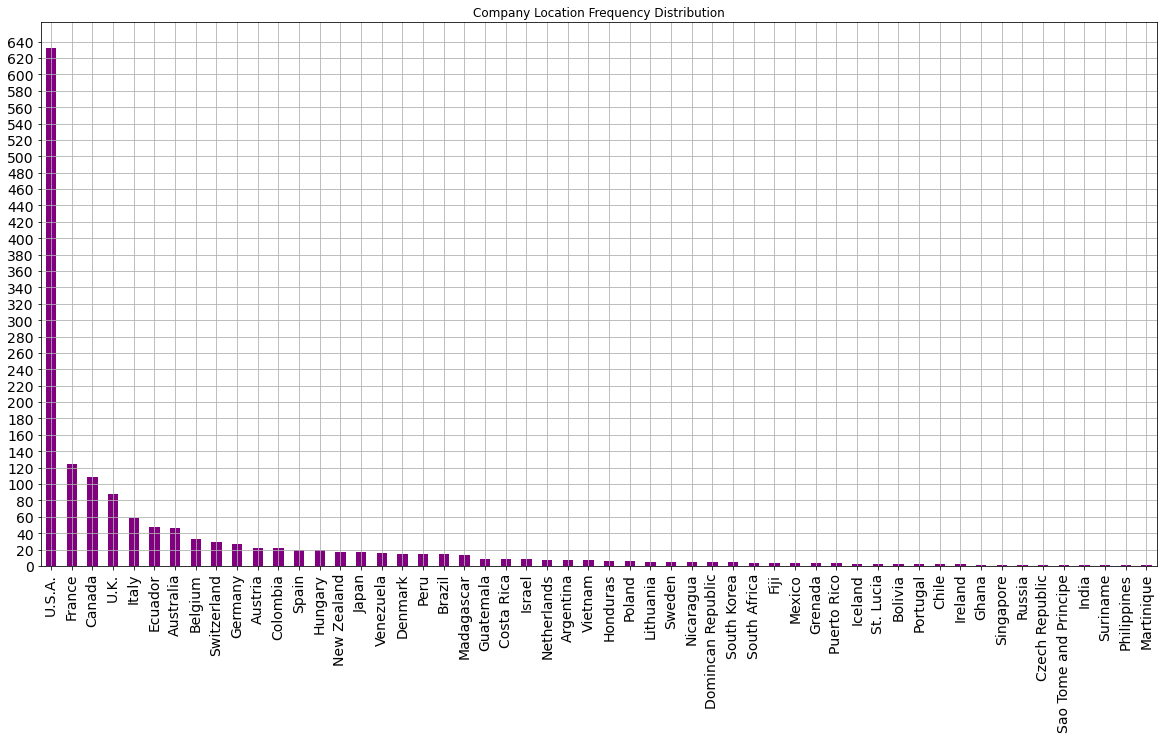

In [34]:
#BAR GRAPH FOR WHICH COMPANY LOCATION IS MOST COMMON

chocs['company_location'].value_counts().plot(kind='bar', 
                                              figsize=(20,10), 
                                              grid=True,
                                              fontsize=14,
                                              rot=90,
                                              color='purple',
                                              yticks=range(0,650,20)
                                             )

plt.title('Company Location Frequency Distribution')

plt.savefig('Company_Location')
plt.show()

In [35]:
chocs['company_location'].value_counts()

#MOST CHOCOLATE COMPANIES ARE BASED IN USA, FRANCE, CANADA, UK OR ITALY

#TOP 10 COMPANY LOCATIONS CONTRIBUTE 79.5% OF THIS DATASET

U.S.A.                   632
France                   124
Canada                   108
U.K.                      88
Italy                     59
Ecuador                   47
Australia                 46
Belgium                   33
Switzerland               29
Germany                   27
Austria                   22
Colombia                  22
Spain                     20
Hungary                   19
New Zealand               17
Japan                     17
Venezuela                 16
Denmark                   14
Peru                      14
Brazil                    14
Madagascar                13
Guatemala                  9
Costa Rica                 8
Israel                     8
Netherlands                7
Argentina                  7
Vietnam                    7
Honduras                   6
Poland                     6
Lithuania                  5
Sweden                     5
Nicaragua                  5
Domincan Republic          5
South Korea                5
South Africa  

### D. Cleaning Categorical Column 4: "bean_type"

In [36]:
chocs['bean_type'].value_counts()

#BEAN TYPE FOR HALF OF THE CHOCOLATES 750+1 IS UNKNOWN

                            750
Trinitario                  342
Criollo                     128
Forastero                    67
Forastero (Nacional)         46
Blend                        34
Criollo, Trinitario          33
Forastero (Arriba)           32
Trinitario, Criollo           9
Criollo (Porcelana)           8
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Nacional (Arriba)             3
Beniano                       3
Amazon mix                    2
Criollo (Ocumare 61)          2
Matina                        2
Trinitario (85% Criollo)      2
Criollo, Forastero            2
Amazon, ICS                   2
Trinitario (Amelonado)        1
Trinitario (Scavina)          1
CCN51                         1
Criollo (Ocumare 77)          1
Trinitario, Nacional          1
Criollo (Wild)                1
Criollo (Ocumare 67)          1
Forastero (Arriba) ASSS       1
Blend-Forastero,Criollo       1
Trinitario, TCGA              1
Foraster

    ii) Unique returns all category types as a list of strings: '\xa0' IS OBSERVED

In [37]:
chocs['bean_type'].unique()

array(['Criollo, Trinitario', 'Blend', 'Matina', '\xa0', 'CCN51',
       'Forastero (Arriba) ASSS', 'Trinitario', 'Criollo', 'Amazon mix',
       'Nacional', 'Forastero (Arriba)', 'Forastero (Nacional)',
       'Forastero (Arriba) ASS', 'Forastero', 'Criollo (Ocumare 61)', nan,
       'Trinitario, Criollo', 'Trinitario (85% Criollo)',
       'Criollo (Amarru)', 'Beniano', 'Forastero (Parazinho)',
       'Criollo (Porcelana)', 'Criollo (Ocumare 67)', 'Criollo (Wild)',
       'Nacional (Arriba)', 'Criollo, Forastero', 'Amazon, ICS',
       'Blend-Forastero,Criollo', 'Trinitario (Amelonado)', 'EET',
       'Trinitario, TCGA', 'Forastero, Trinitario',
       'Trinitario, Nacional', 'Trinitario, Forastero',
       'Trinitario (Scavina)', 'Criollo (Ocumare 77)',
       'Forastero (Catongo)'], dtype=object)

    iii) '\xa0' is replaced with '' to indicate value not present

In [38]:
#REPLACED WITH '' AS FURTHER STRING BASED MANIPULATION IS PLANNED


#chocs['bean_type']=chocs['bean_type'].replace(u"\xa0",np.nan)
chocs['bean_type']=chocs['bean_type'].replace(u"\xa0",'')

In [39]:
chocs['bean_type'].isnull().sum()

1

In [40]:
#FILLED NULL VALUES WITH '' AS REPRESENTS ORIGIN IS UNKNOWN

chocs['bean_type'].fillna('', inplace=True)

In [41]:
#HAVING A LOOK AT THE DATA

chocs.sort_values(by=['bean_type'])

,company,specific_bean_origin,ref,review_year,cocoa_percentage,company_location,rating,bean_type,broad_bean_origin
1499,Hotel Chocolat,"Pepiniere,single Cote",1654,2015,70.0,U.K.,2.75,,St. Lucia
585,Holy Cacao,Mara,1466,2015,70.0,Israel,3.50,,Venezuela
1156,Isidro,Peru,1279,2014,72.0,U.S.A.,2.25,,Peru
1154,Rogue,Hispaniola,1081,2013,70.0,U.S.A.,3.50,,Dominican Republic
1153,Emily's,Patanemo,1450,2015,79.0,Japan,3.00,,Venezuela
...,...,...,...,...,...,...,...,...,...
1115,La Chocolaterie Nanairo,Belize,1892,2016,70.0,Japan,3.00,"Trinitario, Criollo",Belize
205,Scharffen Berger,Amina,464,2010,65.0,U.S.A.,3.75,"Trinitario, Criollo",Madagascar
1259,Pralus,"Caracas,Ghana,Venezuela",99,2006,75.0,France,3.00,"Trinitario, Forastero","Venezuela, Ghana"
1151,Soma,Black Science Blend,607,2010,70.0,Canada,3.75,"Trinitario, Nacional","DR, Ecuador, Peru"


### Main bean_types are :
    Amazon, Beniano, Blend, CCN51, Criollo, EET, Forastero, Matina, Nacional, Trinitario

In [42]:
arr=chocs['bean_type'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])


Amazon mix
Amazon, ICS
Beniano
Blend
Blend-Forastero,Criollo
CCN51
Criollo
Criollo (Amarru)
Criollo (Ocumare 61)
Criollo (Ocumare 67)
Criollo (Ocumare 77)
Criollo (Porcelana)
Criollo (Wild)
Criollo, Forastero
Criollo, Trinitario
EET
Forastero
Forastero (Arriba)
Forastero (Arriba) ASS
Forastero (Arriba) ASSS
Forastero (Catongo)
Forastero (Nacional)
Forastero (Parazinho)
Forastero, Trinitario
Matina
Nacional
Nacional (Arriba)
Trinitario
Trinitario (85% Criollo)
Trinitario (Amelonado)
Trinitario (Scavina)
Trinitario, Criollo
Trinitario, Forastero
Trinitario, Nacional
Trinitario, TCGA


In [43]:
chocs['bean_type']=chocs['bean_type'].replace('Trinitario, Criollo','Criollo, Trinitario')
chocs['bean_type']=chocs['bean_type'].replace('Trinitario, Forastero', 'Forastero, Trinitario')
chocs['bean_type']=chocs['bean_type'].replace('Blend-Forastero,Criollo', 'Criollo, Forastero')

In [44]:
arr=chocs['bean_type'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])


Amazon mix
Amazon, ICS
Beniano
Blend
CCN51
Criollo
Criollo (Amarru)
Criollo (Ocumare 61)
Criollo (Ocumare 67)
Criollo (Ocumare 77)
Criollo (Porcelana)
Criollo (Wild)
Criollo, Forastero
Criollo, Trinitario
EET
Forastero
Forastero (Arriba)
Forastero (Arriba) ASS
Forastero (Arriba) ASSS
Forastero (Catongo)
Forastero (Nacional)
Forastero (Parazinho)
Forastero, Trinitario
Matina
Nacional
Nacional (Arriba)
Trinitario
Trinitario (85% Criollo)
Trinitario (Amelonado)
Trinitario (Scavina)
Trinitario, Nacional
Trinitario, TCGA


In [45]:
#CLEANING THE COLUMN REMOVING TYPOS, BRACKETS etc.


def bean_prep(text):
    replacements = [
        ['/', ','], 
        ['-', ','], 
        ['\(', ','],
        ['%',''],
        ['\)', ','], 
        [', $', ''], 
        [',  ', ','],
        [' ,',','],
        [',\s+', ','],
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

chocs['bean_type']=chocs['bean_type'].apply(bean_prep)

chocs['bean_type']=chocs['bean_type'].str.strip(',')

#Replacing blank bean_type wit unknown
chocs['bean_type']=chocs['bean_type'].replace('','Unknown')



    

In [46]:
chocs['bean_type'].value_counts()


Unknown                  751
Trinitario               342
Criollo                  128
Forastero                 67
Forastero,Nacional        46
Criollo,Trinitario        42
Blend                     34
Forastero,Arriba          32
Criollo,Porcelana          8
Forastero,Parazinho        8
Forastero,Arriba,ASS       6
Criollo,Forastero          3
Beniano                    3
Nacional,Arriba            3
EET                        3
Criollo,Ocumare 61         2
Trinitario,85 Criollo      2
Forastero,Trinitario       2
Matina                     2
Amazon mix                 2
Amazon,ICS                 2
Nacional                   1
CCN51                      1
Trinitario,Scavina         1
Forastero,Catongo          1
Trinitario,TCGA            1
Criollo,Ocumare 67         1
Forastero,Arriba,ASSS      1
Criollo,Ocumare 77         1
Trinitario,Amelonado       1
Criollo,Wild               1
Trinitario,Nacional        1
Criollo,Amarru             1
Name: bean_type, dtype: int64

In [47]:
#Printing the unique values in alphabetical order

arr=chocs['bean_type'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])

Amazon mix
Amazon,ICS
Beniano
Blend
CCN51
Criollo
Criollo,Amarru
Criollo,Forastero
Criollo,Ocumare 61
Criollo,Ocumare 67
Criollo,Ocumare 77
Criollo,Porcelana
Criollo,Trinitario
Criollo,Wild
EET
Forastero
Forastero,Arriba
Forastero,Arriba,ASS
Forastero,Arriba,ASSS
Forastero,Catongo
Forastero,Nacional
Forastero,Parazinho
Forastero,Trinitario
Matina
Nacional
Nacional,Arriba
Trinitario
Trinitario,85 Criollo
Trinitario,Amelonado
Trinitario,Nacional
Trinitario,Scavina
Trinitario,TCGA
Unknown


In [48]:
#ARRANGING THE COLUMN ENTRY WORDS IN ALPHABETICAL ORDER TO REMOVE REDUNDANCY

def bean_sort(text):
    split_string=text.split(',')
    text = sorted(split_string, key=str.lower)
    s=','
    text=s.join(text)
    return text

chocs['bean_type']=chocs['bean_type'].apply(bean_sort)

#PRINTING THE DATA TO MAKE SURE IT IS CLEAN
arr=chocs['bean_type'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])


85 Criollo,Trinitario
Amarru,Criollo
Amazon mix
Amazon,ICS
Amelonado,Trinitario
Arriba,ASS,Forastero
Arriba,ASSS,Forastero
Arriba,Forastero
Arriba,Nacional
Beniano
Blend
Catongo,Forastero
CCN51
Criollo
Criollo,Forastero
Criollo,Ocumare 61
Criollo,Ocumare 67
Criollo,Ocumare 77
Criollo,Porcelana
Criollo,Trinitario
Criollo,Wild
EET
Forastero
Forastero,Nacional
Forastero,Parazinho
Forastero,Trinitario
Matina
Nacional
Nacional,Trinitario
Scavina,Trinitario
TCGA,Trinitario
Trinitario
Unknown


In [49]:
len(chocs['bean_type'].value_counts())

#THERE ARE 29 BEAN TYPES OUT OF WHICH ONE TYPE IS 'UNKNOWN'

33

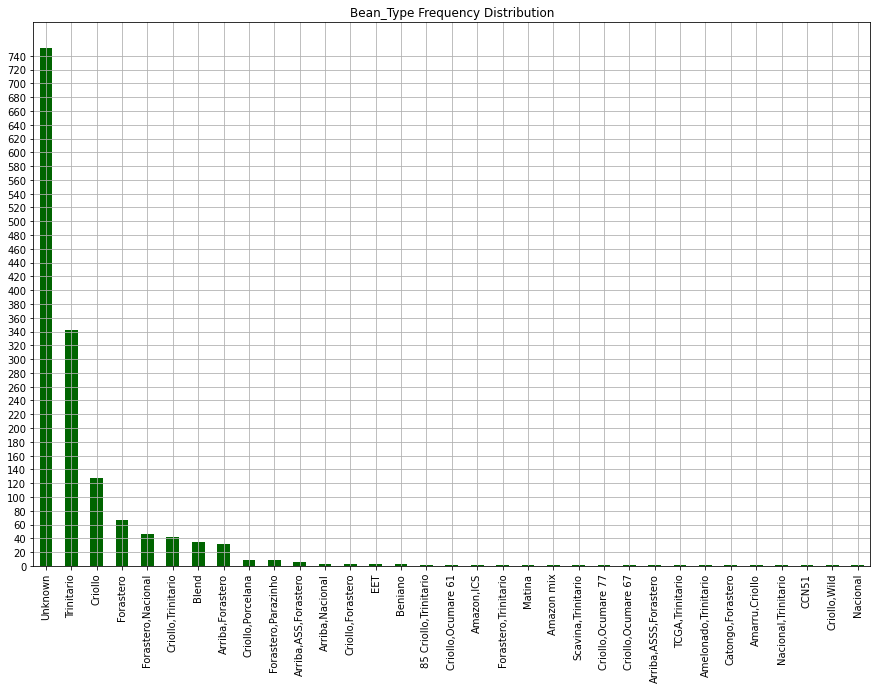

In [50]:
#PLOTTING BEAN_TYPE FREQUENCY INCLUDING UNKNOWN bean_type

chocs['bean_type'].value_counts().plot(kind='bar', 
                                       figsize=(15,10), 
                                       color='darkgreen', 
                                       rot=90, 
                                       yticks=range(0,760,20), 
                                       grid=True)

plt.title('Bean_Type Frequency Distribution')

plt.savefig('Bean_Type')
plt.show()


In [51]:
#WITHOUT UNKNOWN bean_type

s=chocs['bean_type'].value_counts()

s=s.drop(s.index[0])

s


Trinitario               342
Criollo                  128
Forastero                 67
Forastero,Nacional        46
Criollo,Trinitario        42
Blend                     34
Arriba,Forastero          32
Criollo,Porcelana          8
Forastero,Parazinho        8
Arriba,ASS,Forastero       6
Arriba,Nacional            3
Criollo,Forastero          3
EET                        3
Beniano                    3
85 Criollo,Trinitario      2
Criollo,Ocumare 61         2
Amazon,ICS                 2
Forastero,Trinitario       2
Matina                     2
Amazon mix                 2
Scavina,Trinitario         1
Criollo,Ocumare 77         1
Criollo,Ocumare 67         1
Arriba,ASSS,Forastero      1
TCGA,Trinitario            1
Amelonado,Trinitario       1
Catongo,Forastero          1
Amarru,Criollo             1
Nacional,Trinitario        1
CCN51                      1
Criollo,Wild               1
Nacional                   1
Name: bean_type, dtype: int64

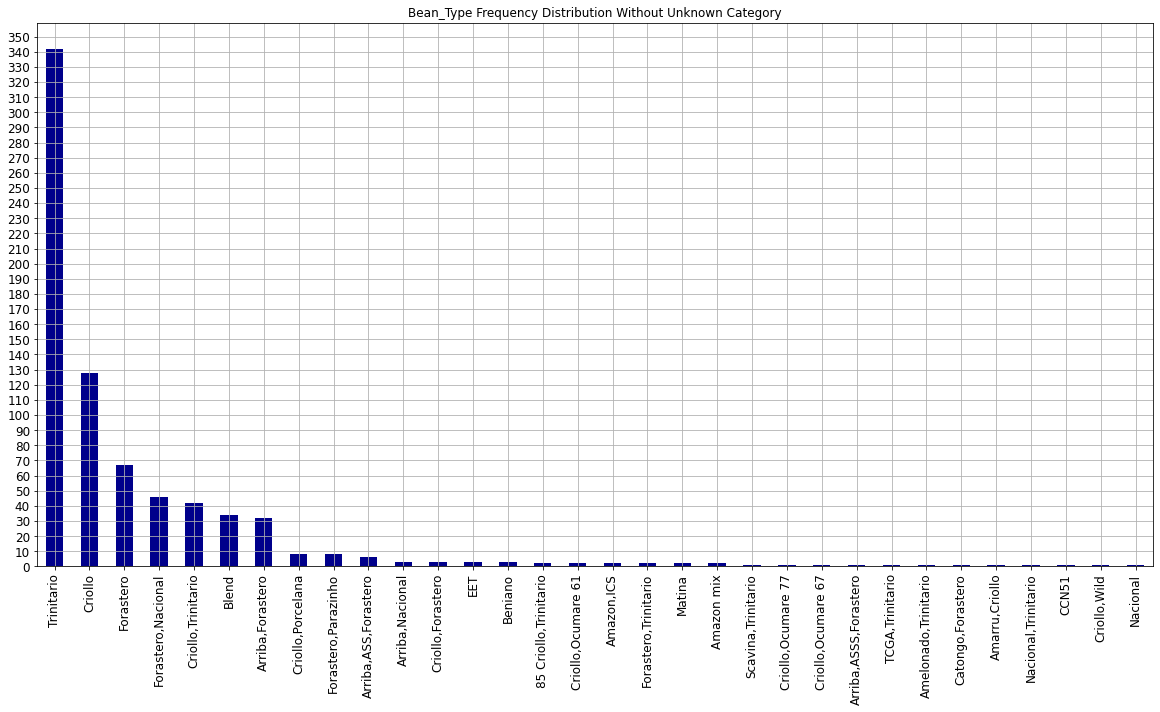

In [52]:
#PLOTTING bean_type FREQUENCY WITHOUT UNKNOWN bean_type (FOR FLATTER VISUALIZATION)


s.plot(kind='bar', figsize=(20,10), color='darkblue', rot=90, yticks=range(0,360,10), grid=True, fontsize=12)
plt.title('Bean_Type Frequency Distribution Without Unknown Category')
plt.savefig('bean_Type_flatter')
plt.show()

### E. Cleaning Categorical Column 5: "broad_bean_origin" 

In [53]:
chocs[chocs['broad_bean_origin']=='\xa0'] #THERE ARE 61 BLANK VALUES IN THIS COLUMN

,company,specific_bean_origin,ref,review_year,cocoa_percentage,company_location,rating,bean_type,broad_bean_origin
1,Original Beans (Felchlin),Grand Cru,1442,2014,80.0,Switzerland,3.25,Blend,
7,Kaoka (Cemoi),Noir,404,2009,70.0,France,2.75,Unknown,
39,Amedei,Toscano Black,170,2007,63.0,Italy,3.50,Blend,
40,Chloe Chocolat,Blend No,672,2011,70.0,France,3.50,Unknown,
42,Domori,Ilblend,272,2008,70.0,Italy,3.75,Blend,
131,Amedei,Toscano Black,40,2006,70.0,Italy,5.00,Blend,
140,S.A.I.D.,percent,615,2010,100.0,Italy,1.50,Unknown,
183,Guittard,Lever du Soleil,654,2011,61.0,U.S.A.,3.25,Unknown,
214,Zak's,House,1582,2015,60.0,U.S.A.,3.00,Unknown,
276,Valrhona,Le Noir Extra Amer,147,2007,85.0,France,1.50,Unknown,


In [54]:
chocs['broad_bean_origin'].value_counts() #INITIALLY THERE ARE 93 TYPES OF VALUES (CATEGORIES)

Venezuela                       174
Ecuador                         164
Peru                            140
Dominican Republic              120
Madagascar                      120
                                 61
Nicaragua                        53
Brazil                           48
Bolivia                          45
Belize                           40
Papua New Guinea                 39
Colombia                         37
Costa Rica                       34
Trinidad                         28
Ghana                            28
Vietnam                          28
Mexico                           27
Guatemala                        27
Tanzania                         26
Hawaii                           21
Domincan Republic                16
Jamaica                          15
Indonesia                        15
Grenada                          14
Honduras                         13
Cuba                             10
Sao Tome                         10
Haiti                       

In [55]:
chocs['broad_bean_origin']=chocs['broad_bean_origin'].replace(u"\xa0",'') 

#REPLACING WITH "" AS NEED TO SORT ALPHABETICALLY




In [56]:
chocs['broad_bean_origin'].isnull().sum()


#NULL VALUE ALSO PRESENT

1

In [57]:
chocs['broad_bean_origin'].fillna('', inplace=True)

#FILLING NULL VALUE ALSO WITH '' AS NEED TO USE STRING SORTED() FUNCTION FOR ALPHABETICAL MANIPULATION

In [58]:
chocs['broad_bean_origin']=chocs['broad_bean_origin'].replace('','Unknown')

chocs['broad_bean_origin'].unique()

#ALL UNIQUE VALUES CAN BE SEEN

array(['Madagascar', 'Unknown', 'Costa Rica', 'Nicaragua', 'Colombia',
       'Ecuador', 'Trinidad', 'Venezuela', 'Dominican Republic', 'Peru',
       'Peru, Mad., Dom. Rep.', 'Domincan Republic', 'Jamaica', 'Vietnam',
       'Mexico', 'Honduras', 'Guatemala', 'Sri Lanka', 'Indonesia',
       'Puerto Rico', 'St. Lucia', 'Hawaii', 'Peru, Ecuador', 'Ghana',
       'Brazil', 'Ivory Coast', 'Uganda', 'Samoa', 'Tanzania',
       'Papua New Guinea', 'Togo', 'Bolivia', 'Panama', 'Belize',
       'Vanuatu', 'Fiji', 'Peru, Madagascar', 'Central and S. America',
       'Tobago', 'Sao Tome', 'Trinidad, Tobago', 'Cuba',
       'Ven, Bolivia, D.R.', 'Sao Tome & Principe', 'Carribean',
       'Venezuela, Dom. Rep.', 'Dominican Rep., Bali',
       'Ghana, Panama, Ecuador', 'Grenada', 'Principe',
       'Venezuela, Trinidad', 'Australia', 'South America',
       'Colombia, Ecuador', 'Ecuador, Costa Rica',
       'South America, Africa', 'Malaysia', 'Congo', 'PNG, Vanuatu, Mad',
       'Gre., PNG, Haw.

In [59]:
#PRINTING ALL THE UNIQUE VALUES IN broad_bean_origin COLUMN IN ALPHABETICAL ORDER TOP TO BOTTOM

arr=chocs['broad_bean_origin'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])

Africa, Carribean, C. Am.
Australia
Belize
Bolivia
Brazil
Burma
Carribean
Carribean(DR/Jam/Tri)
Central and S. America
Colombia
Colombia, Ecuador
Congo
Cost Rica, Ven
Costa Rica
Cuba
Dom. Rep., Madagascar
Domincan Republic
Dominican Rep., Bali
Dominican Republic
DR, Ecuador, Peru
Ecuador
Ecuador, Costa Rica
Ecuador, Mad., PNG
El Salvador
Fiji
Ghana
Ghana & Madagascar
Ghana, Domin. Rep
Ghana, Panama, Ecuador
Gre., PNG, Haw., Haiti, Mad
Grenada
Guatemala
Haiti
Hawaii
Honduras
India
Indonesia
Indonesia, Ghana
Ivory Coast
Jamaica
Liberia
Mad., Java, PNG
Madagascar
Madagascar & Ecuador
Malaysia
Martinique
Mexico
Nicaragua
Nigeria
Panama
Papua New Guinea
Peru
Peru, Belize
Peru, Dom. Rep
Peru, Ecuador
Peru, Ecuador, Venezuela
Peru, Mad., Dom. Rep.
Peru, Madagascar
Philippines
PNG, Vanuatu, Mad
Principe
Puerto Rico
Samoa
Sao Tome
Sao Tome & Principe
Solomon Islands
South America
South America, Africa
Sri Lanka
St. Lucia
Suriname
Tanzania
Tobago
Togo
Trinidad
Trinidad, Ecuador
Trinidad, Tobago


In [60]:
#TEXT PREP FUNCTION REMOVES WHITE SPACES, REPLACES /,-,(, ) WITH ,  THUS CLEANS UP THE ENTRIES


def txt_prep2(text):
    replacements = [
        ['/', ','], 
        ['-', ','], 
        ['\(', ','], 
        ['\)', ','], 
        [', $', ''], 
        [',  ', ', '], 
        [',\s+', ','],
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

chocs['broad_bean_origin']=chocs['broad_bean_origin'].apply(txt_prep2)

#PRINTING THE ENTRIES AFTER INITIAL CLEANING TO SO WHAT NEXT TO CLEAN...

arr=chocs['broad_bean_origin'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])

Africa,Carribean,C. Am.
Australia
Belize
Bolivia
Brazil
Burma
Carribean
Carribean,DR,Jam,Tri,
Central and S. America
Colombia
Colombia,Ecuador
Congo
Cost Rica,Ven
Costa Rica
Cuba
Dom. Rep.,Madagascar
Domincan Republic
Dominican Rep.,Bali
Dominican Republic
DR,Ecuador,Peru
Ecuador
Ecuador,Costa Rica
Ecuador,Mad.,PNG
El Salvador
Fiji
Ghana
Ghana & Madagascar
Ghana,Domin. Rep
Ghana,Panama,Ecuador
Gre.,PNG,Haw.,Haiti,Mad
Grenada
Guatemala
Haiti
Hawaii
Honduras
India
Indonesia
Indonesia,Ghana
Ivory Coast
Jamaica
Liberia
Mad.,Java,PNG
Madagascar
Madagascar & Ecuador
Malaysia
Martinique
Mexico
Nicaragua
Nigeria
Panama
Papua New Guinea
Peru
Peru,Belize
Peru,Dom. Rep
Peru,Ecuador
Peru,Ecuador,Venezuela
Peru,Mad.,Dom. Rep.
Peru,Madagascar
Philippines
PNG,Vanuatu,Mad
Principe
Puerto Rico
Samoa
Sao Tome
Sao Tome & Principe
Solomon Islands
South America
South America,Africa
Sri Lanka
St. Lucia
Suriname
Tanzania
Tobago
Togo
Trinidad
Trinidad,Ecuador
Trinidad,Tobago
Uganda
Unknown
Vanuatu
Ven,Bolivia

In [61]:
#CLEANING UP INDIVIDUAL broad_bean_origin ENTIRES TO REMOVE ABBRIVIATIONS AND SPELLING ERRORS


chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'C. Am.', 'Central America')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'S. America', 'South America')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Brasil', 'Brazil')


chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'DR', 'Dominican Republic')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'Dom. Rep', 'Dominican Republic')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('D.R.', 'Dominican Republic')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Dominican Rep\.,', 'Dominican Republic,')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Domin\. Rep', 'Dominican Republic,')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Domincan', 'Dominican')

chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'Venez,Africa,Brasil,Peru,Mex', 'Venezuela,Africa,Brasil,Peru,Mexico')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Ven\.,', 'Venezuela,')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Ven,', 'Venezuela,')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Venez,', 'Venezuela,')

chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'Ecu.,', 'Ecuador,')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'Mad\.', 'Madagascar')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Nic\.', 'Nicaragua')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Haw\.', 'Hawaii')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Gre\.,', 'Grenada,')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('PNG', 'Papua New Guinea')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Jam,', 'Jamaica,')

chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(',Trinidad,', ',Trinidad and Tobago,')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Tri,', 'Trinidad and Tobago')

chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Sao Tome', 'Sao Tome and Principe')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Sao Tome and Principe & Principe', 'Sao Tome and Principe')

chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Papua New Guinea,Vanuatu,Mad', 'Papua New Guinea,Vanuatu,Madagascar')


chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Cost Rica,Ven','Costa Rica,Venezuela')
#chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Dominican Republic,Madagascargascar','Dominican Republic,Madagascar')

chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Grenada,Papua New Guinea,Hawaii,Haiti,Mad','Grenada,Papua New Guinea,Hawaii,Haiti,Madagascar')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Venezuela,Africa,Brazil,Peru,Mex','Venezuela,Africa,Brazil,Peru,Mexico')



<ipython-input-61-8534ceb4e979>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'C. Am.', 'Central America')
<ipython-input-61-8534ceb4e979>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'S. America', 'South America')
<ipython-input-61-8534ceb4e979>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace(r'Dom. Rep', 'Dominican Republic')
<ipython-input-61-8534ceb4e979>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('D.R.', 'Dominican Republic')
<ipython-input-61-8534ceb4e979>:12: FutureWarning: The default value of regex will 

In [62]:
#FUNCTION TO GIVE FINAL CLEAN UP TO ADDRESS ISSUES FROM PREVIOUS CLEAN UP

def txt_prep3(text):
    replacements = [
        [' & ',','],
        ['Trinidad$|^Trinidad,|^Tobago','Trinidad and Tobago,'],
        ['^Principe','Sao Tome and Principe'],
        ['\.,',',']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

chocs['broad_bean_origin']=chocs['broad_bean_origin'].apply(txt_prep3) #APPLYING THE FUNCTION text_prep3

#REMOVING LEADING AND TRAILING COMMAS AND FULL STOPS
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.strip('.')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.strip(',')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Trinidad and Tobago,Tobago','Trinidad and Tobago')
chocs['broad_bean_origin']=chocs['broad_bean_origin'].str.replace('Central and South America','Central America,South America')



#PRINTING ALL THE CLEANED ENTRIES IN ALPHABETICALL ORDER TO MAKE SURE DATA HAS BEEN THOROUGHLY CLEANED
arr=chocs['broad_bean_origin'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])



Africa,Carribean,Central America
Australia
Belize
Bolivia
Brazil
Burma
Carribean
Carribean,Dominican Republic,Jamaica,Trinidad and Tobago
Central America,South America
Colombia
Colombia,Ecuador
Congo
Costa Rica
Costa Rica,Venezuela
Cuba
Dominican Republic
Dominican Republic,Bali
Dominican Republic,Ecuador,Peru
Dominican Republic,Madagascar
Ecuador
Ecuador,Costa Rica
Ecuador,Madagascar,Papua New Guinea
El Salvador
Fiji
Ghana
Ghana,Dominican Republic
Ghana,Madagascar
Ghana,Panama,Ecuador
Grenada
Grenada,Papua New Guinea,Hawaii,Haiti,Madagascar
Guatemala
Haiti
Hawaii
Honduras
India
Indonesia
Indonesia,Ghana
Ivory Coast
Jamaica
Liberia
Madagascar
Madagascar,Ecuador
Madagascar,Java,Papua New Guinea
Malaysia
Martinique
Mexico
Nicaragua
Nigeria
Panama
Papua New Guinea
Papua New Guinea,Vanuatu,Madagascar
Peru
Peru,Belize
Peru,Dominican Republic
Peru,Ecuador
Peru,Ecuador,Venezuela
Peru,Madagascar
Peru,Madagascar,Dominican Republic
Philippines
Puerto Rico
Samoa
Sao Tome and Principe
Solomon Isla

In [63]:
#THIS FUNCTION SORTS THE COUNTRY NAMES IN EACH ENTRY OF THE broad_bean_origin COLUMN IN ALPHABETICAL ORDER

def txt_sort(text):
    split_string=text.split(',')
    text = sorted(split_string, key=str.lower)
    s=','
    text=s.join(text)
    return text

chocs['broad_bean_origin']=chocs['broad_bean_origin'].apply(txt_sort)

#PRINTING THE DATA TO MAKE SURE IT IS CLEAN
arr=chocs['broad_bean_origin'].unique()
list1=sorted(arr, key=str.lower)
length=len(list1)
for i in range(0,length):
    print (list1[i])



Africa,Brazil,Mexico,Peru,Venezuela
Africa,Carribean,Central America
Africa,South America
Australia
Bali,Dominican Republic
Belize
Belize,Peru
Bolivia
Bolivia,Dominican Republic,Venezuela
Brazil
Burma
Carribean
Carribean,Dominican Republic,Jamaica,Trinidad and Tobago
Central America,South America
Colombia
Colombia,Ecuador
Congo
Costa Rica
Costa Rica,Ecuador
Costa Rica,Venezuela
Cuba
Dominican Republic
Dominican Republic,Ecuador,Peru
Dominican Republic,Ghana
Dominican Republic,Madagascar
Dominican Republic,Madagascar,Peru
Dominican Republic,Peru
Dominican Republic,Venezuela
Ecuador
Ecuador,Ghana,Panama
Ecuador,Madagascar
Ecuador,Madagascar,Papua New Guinea
Ecuador,Nicaragua,Peru,Venezuela
Ecuador,Peru
Ecuador,Peru,Venezuela
Ecuador,Trinidad and Tobago
Ecuador,Trinidad and Tobago,Venezuela
El Salvador
Fiji
Ghana
Ghana,Indonesia
Ghana,Madagascar
Ghana,Venezuela
Grenada
Grenada,Haiti,Hawaii,Madagascar,Papua New Guinea
Guatemala
Haiti
Hawaii
Honduras
India
Indonesia
Ivory Coast
Jamaica
Java

In [64]:
chocs['broad_bean_origin'].value_counts() #NUMBER OF UNIQUE ORIGINS REDUCED FROM 93 TO 87

Venezuela                                                   174
Ecuador                                                     164
Peru                                                        140
Dominican Republic                                          136
Madagascar                                                  120
Unknown                                                      62
Nicaragua                                                    53
Brazil                                                       48
Bolivia                                                      45
Belize                                                       40
Papua New Guinea                                             39
Colombia                                                     37
Costa Rica                                                   34
Trinidad and Tobago                                          33
Vietnam                                                      28
Ghana                                   

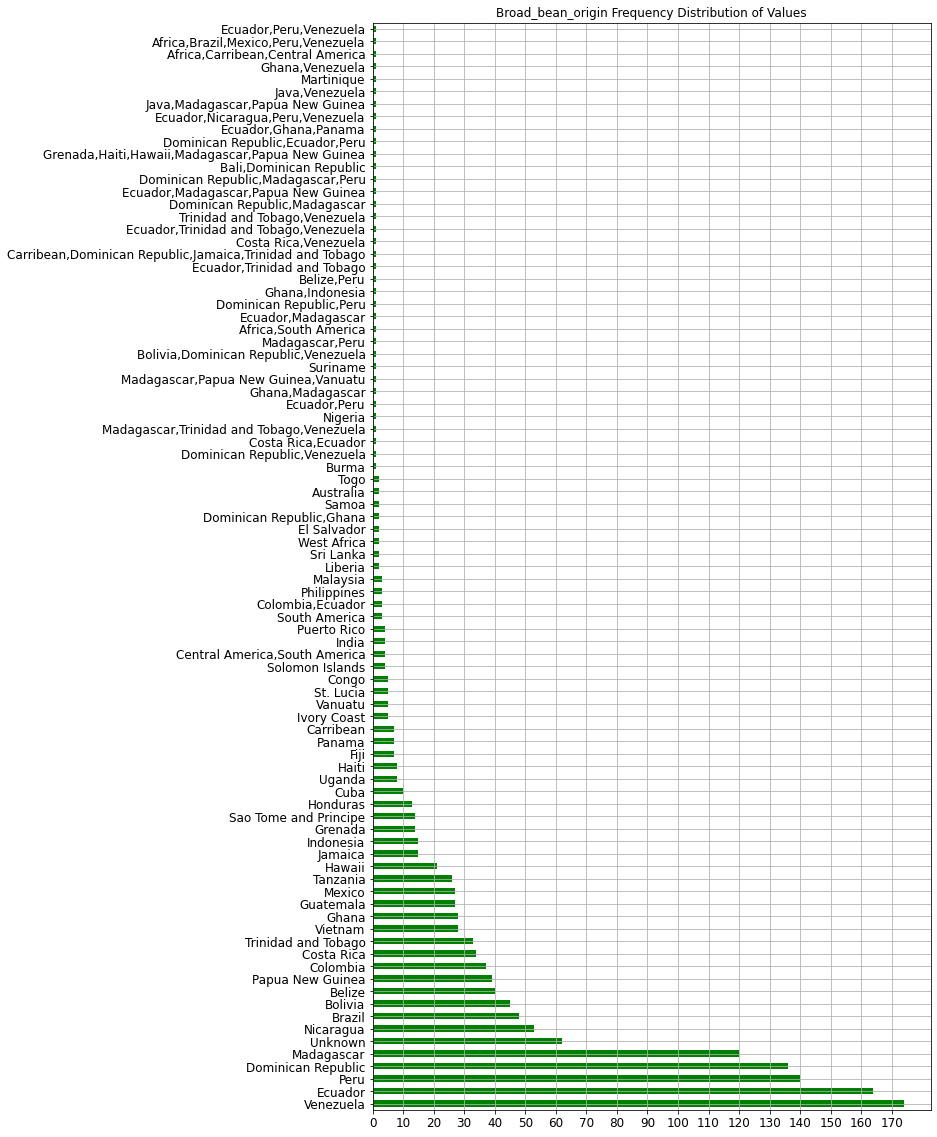

In [65]:
chocs['broad_bean_origin'].value_counts().plot(kind='barh', 
                                               figsize=(10,20), 
                                               fontsize=12,
                                               xticks=range(0,180, 10),
                                               color='green',
                                               grid=True) #PLOTTING THE SOURCE FREQUENCY

plt.title('Broad_bean_origin Frequency Distribution of Values')

plt.savefig('Broad_bean_orgin')
plt.show()

### F. Visualizing NUMERIC Column 1: "ref"

Conclusion: 

    As a high ref value indicates more recently entered review. It can be said that there are more recent reviews than older reviews.

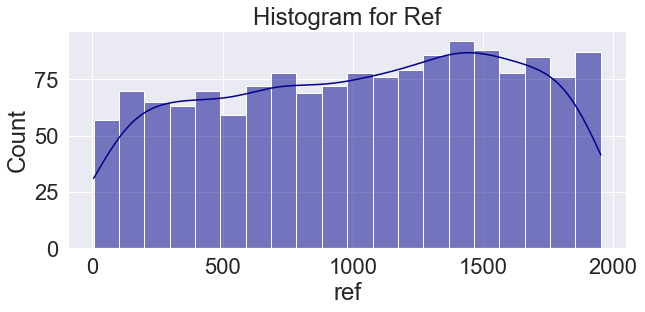

In [66]:
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(10,4))
plt.title('Histogram for Ref')


sns.histplot(data=chocs['ref'], bins=20, kde=True, color='darkblue')

plt.savefig('Histogram_ref')
plt.show()


In [67]:
chocs.describe()

,ref,review_year,cocoa_percentage,rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,1036.881333,2012.326000,71.564000,3.183167
std,554.693828,2.933734,6.264375,0.484319
min,5.000000,2006.000000,42.000000,1.000000
25%,572.000000,2010.000000,70.000000,2.750000
50%,1071.000000,2013.000000,70.000000,3.250000
75%,1503.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


### G. Visualizing NUMERIC Column 2: "review_year"

Conclusion:

    Review year can be considered as a categorical variable
    There are more recent reviews than older reviews

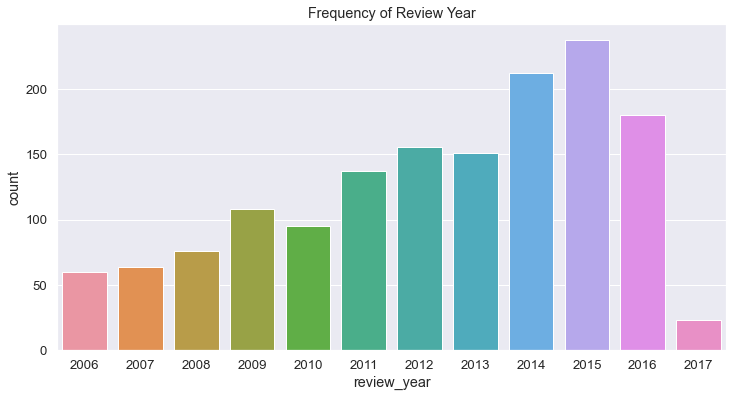

In [68]:

sns.set(font_scale=1.2)

fig, ax = plt.subplots(figsize=(12,6))
plt.title('Frequency of Review Year')

ax = sns.countplot(x=chocs['review_year'])
plt.savefig('review_year_countplot')
plt.show()


#### Relationship between rating and review_year:

Conclusion:
    
    Better ratings were awarded in recent years.
    

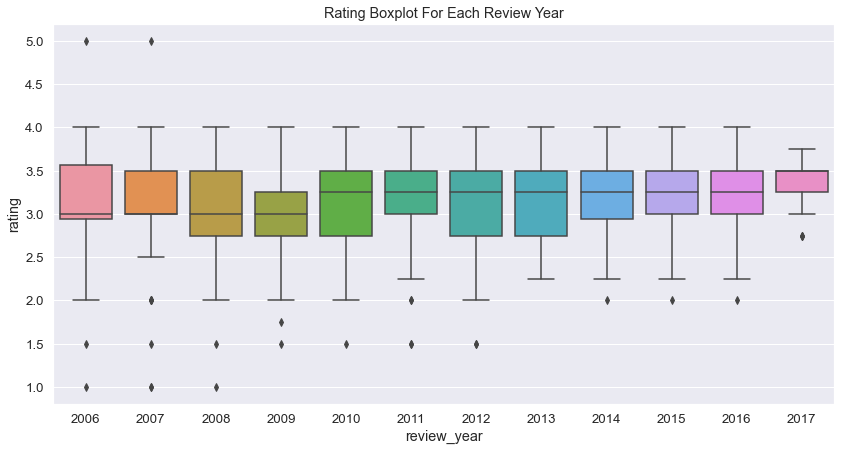

In [69]:

fig, ax = plt.subplots(figsize=(14,7))
plt.title('Rating Boxplot For Each Review Year')

ax = sns.boxplot(data=chocs, y='rating',x='review_year')
plt.savefig('rating_boxplot_per_year')
plt.show()



### H. Visualizing NUMERIC Column 3: "cocoa_percentage"

Conclusion:

    Maximum chocolates have cocoa_percentage around 70%

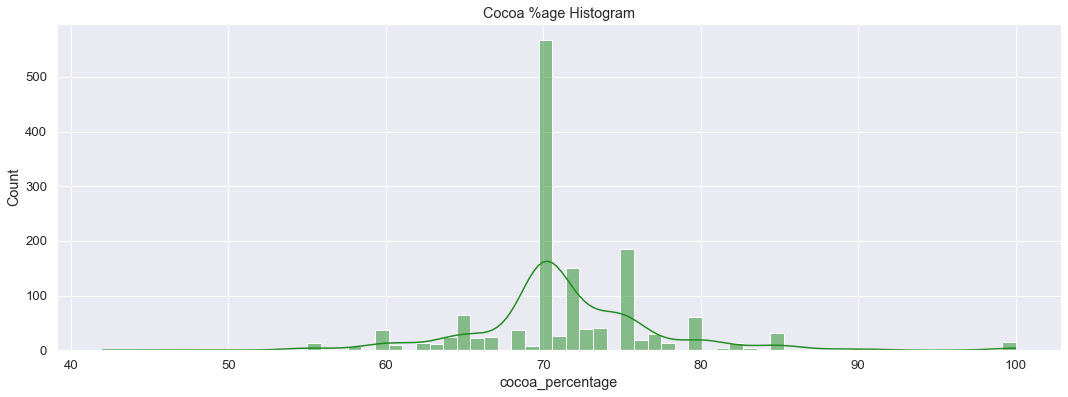

In [70]:

sns.set_style('darkgrid')
sns.set(font_scale=1.2)

fig, ax = plt.subplots(figsize=(18,6))

plt.title('Cocoa %age Histogram')
ax = sns.histplot(chocs['cocoa_percentage'], kde=True, color='forestgreen')
plt.savefig('cocoa_percentage_histogram')
plt.show()



#### Boxplot for cocoa_percentage per rating:

Conclusion

    Cocoa percentage is higher for poorly rated chocolates

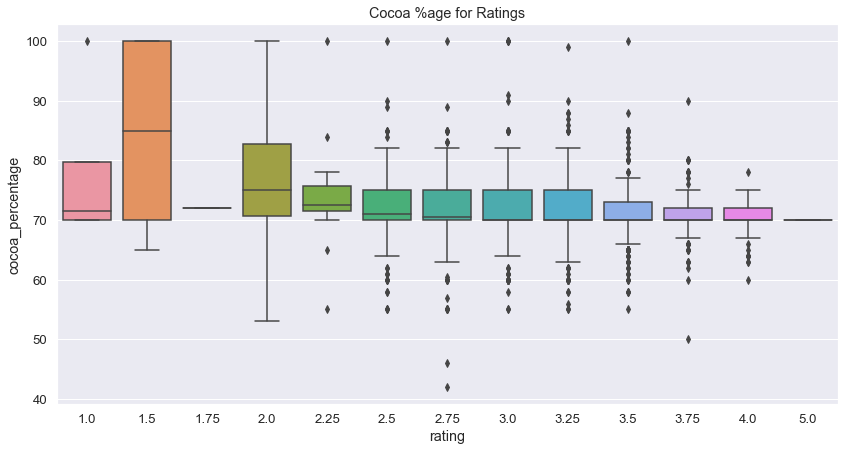

In [71]:
sns.set(font_scale=1.2)

fig, ax = plt.subplots(figsize=(14,7))
plt.title('Cocoa %age for Ratings')

ax = sns.boxplot(y=chocs['cocoa_percentage'],x=chocs['rating'])
plt.savefig('cocoa_percentage_boxplot_per_rating')

plt.show()

In [72]:
#MAKING A COPY FOR LATER AS NOW RATING WILL BE BINNED INTO CATEGORICAL VALUES


chocolate=chocs.copy(deep=True) # A copy for later

### I. Visualizing NUMERIC Column 4: "rating"

    Rating is the TARGET column. It is continuous but is changed to categorical as the Machine Learning Problem has been formulated as a Classification Task.

In [73]:
chocs.groupby(['rating'])['rating'].value_counts()

rating  rating
1.00    1.00        4
1.50    1.50        9
1.75    1.75        1
2.00    2.00       28
2.25    2.25       12
2.50    2.50      115
2.75    2.75      210
3.00    3.00      285
3.25    3.25      251
3.50    3.50      320
3.75    3.75      181
4.00    4.00       82
5.00    5.00        2
Name: rating, dtype: int64

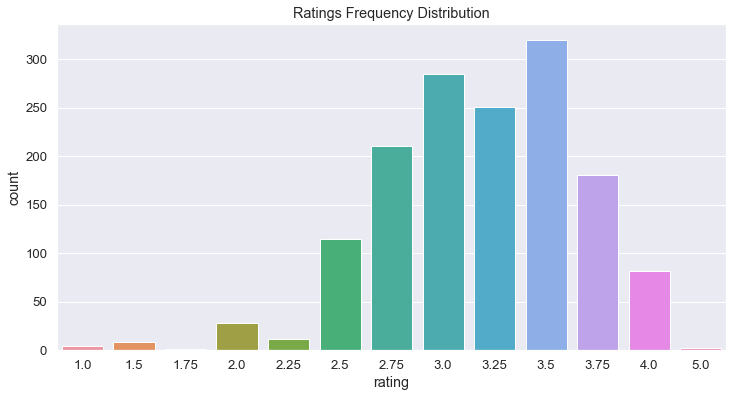

In [74]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Ratings Frequency Distribution')


ax = sns.countplot(x=chocs['rating'])

plt.savefig('rating_count_plot')


In [75]:
chocs.groupby(['rating'])['rating'].value_counts()

rating  rating
1.00    1.00        4
1.50    1.50        9
1.75    1.75        1
2.00    2.00       28
2.25    2.25       12
2.50    2.50      115
2.75    2.75      210
3.00    3.00      285
3.25    3.25      251
3.50    3.50      320
3.75    3.75      181
4.00    4.00       82
5.00    5.00        2
Name: rating, dtype: int64

### The target column labels are binned

In [76]:

def revise_rating(rate):
    if 4<=rate<=5:
        return "4+ Excellent"
    elif 3<=rate<4:
        return "3+ Very Good"
    elif 2<=rate<3:
        return "2+ Good"
    elif 1<=rate<2:
        return "1+ Average"
    else:
        return "0+ Poor"
 



chocs['rating']=chocs['rating'].apply(revise_rating)


### Checking the distribution of target values

In [77]:
chocs.groupby(['rating'])['rating'].value_counts()

rating        rating      
1+ Average    1+ Average        14
2+ Good       2+ Good          365
3+ Very Good  3+ Very Good    1037
4+ Excellent  4+ Excellent      84
Name: rating, dtype: int64

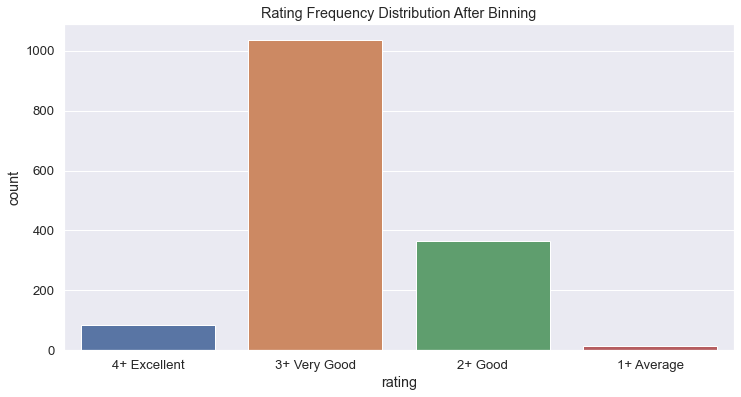

In [78]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Rating Frequency Distribution After Binning')


ax = sns.countplot(x=chocs['rating'])

plt.savefig('Rating After Binning')

plt.show()



#### Pie Chart of Target: Rating

Conclusion:

    Target class distribution is highly imbalanced with "1+ Average" class represented by 1% of the data.
    Imbalanced distribution of classes must be addressed in modelling 
        *By using class_weight='balanced' where applicable
        *And using a metric other than Accuracy (eg: f1-score/roc etc.) for performance assessment

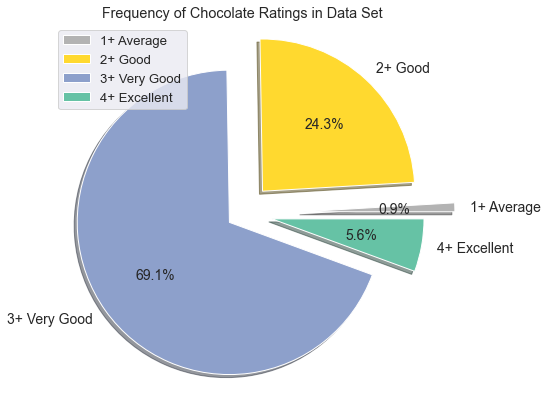

In [79]:
rating_count=chocs.groupby('rating')['rating'].count()
labels=['1+ Average', '2+ Good', '3+ Very Good', '4+ Excellent']
explode=(0.4, 0.2, 0.1, 0.2)

rating_count.plot(kind='pie', 
            legend=True, 
            labels=labels,  
            figsize=(7,7), 
            title='Frequency of Chocolate Ratings in Data Set', 
            autopct='%1.1f%%', 
            colormap='Set2_r', 
            ylabel='', 
            explode=explode,
            fontsize=14,
            shadow=True)

plt.savefig("ratings_pie.jpeg")
plt.show()


#### Visualizing Ratings Frequency for Each Year:

Conclusion:

    3+ rating became very frequent in recent years.
    Rating of 1+ was consistently low
    Most chocolates have a rating of 3+

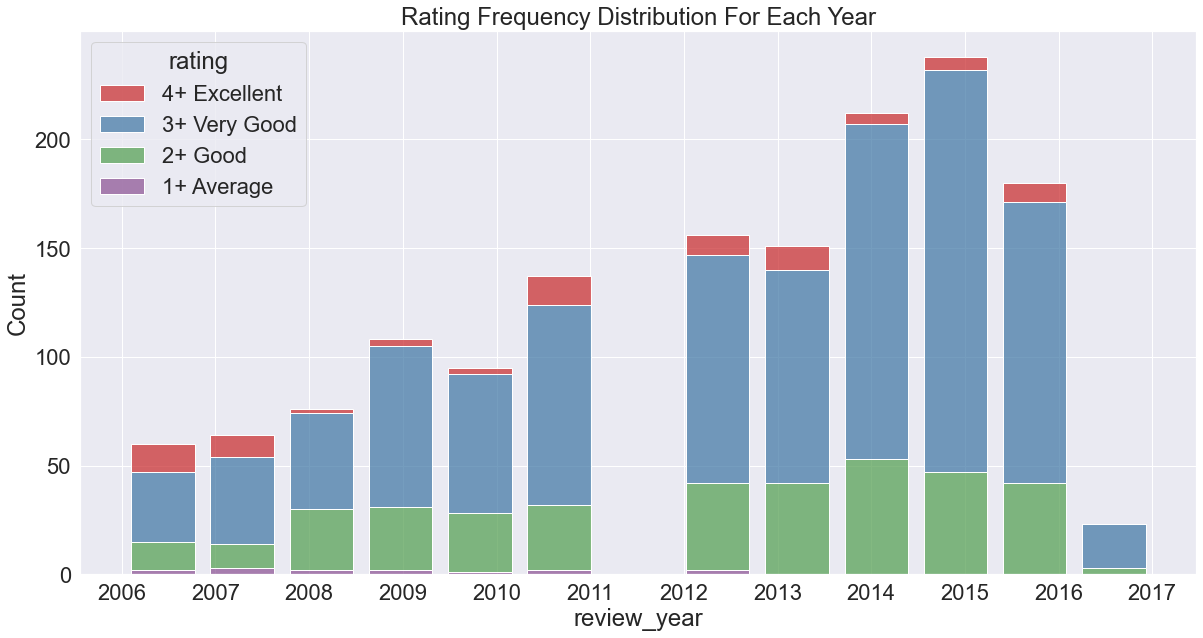

In [80]:
sns.set_style("whitegrid")
sns.set(font_scale=2)

sns.set_palette("Set1", 8, .75)

fig, ax = plt.subplots(figsize=(20,10))

plt.title('Rating Frequency Distribution For Each Year')

#sns.color_palette("husl", 9)
ax.set_xticks([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
ax = sns.histplot(data=chocs, x=chocs['review_year'], hue=chocs['rating'], multiple="stack", shrink=.8)

plt.savefig('RatingFrequencyForEachYear')

### J. VISUALIZING DATA FOR ALL NUMERIC COLUMNS

    
    1. The heatmap shows the correlation between the different numerical columns like ref, review_year, cocoa_percentage and ratings in shades of color green.

    2. There also seems to be a strong positive correlation between the ref and review_year column as it depicts the value closer to 1; being 0.99.

    3. There appears to be little correlation between 
        * ref and ratings (0.12) -Somewhat Correlated 
        * review_year and ratings (0.12) - Somewhat Correlated
        * ref and cocoa_percentage (0.061) - Poor Correlation
    
    4. It is seen that as the cocoa_percentage drops, the ratings value increases slightly, hence showing a negative correlation value of -0.16.

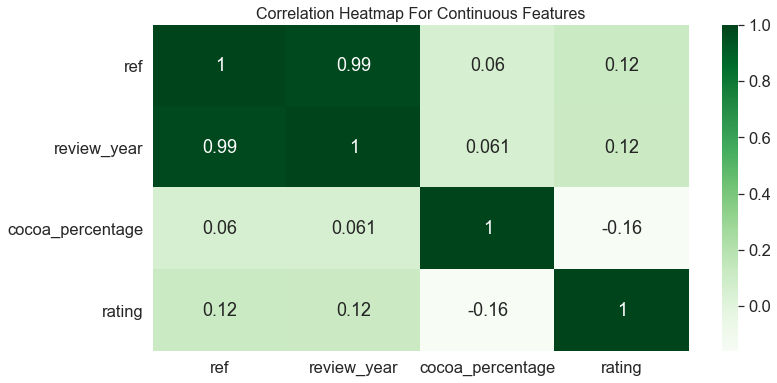

In [81]:
sns.set(font_scale=1.5)

plt.figure(figsize=(12,6))
plt.title('Correlation Heatmap For Continuous Features', fontsize=16)

sns.heatmap(chocolate.corr(), annot=True, cmap='Greens')

plt.savefig('Correlation_Heatmap')

plt.show()


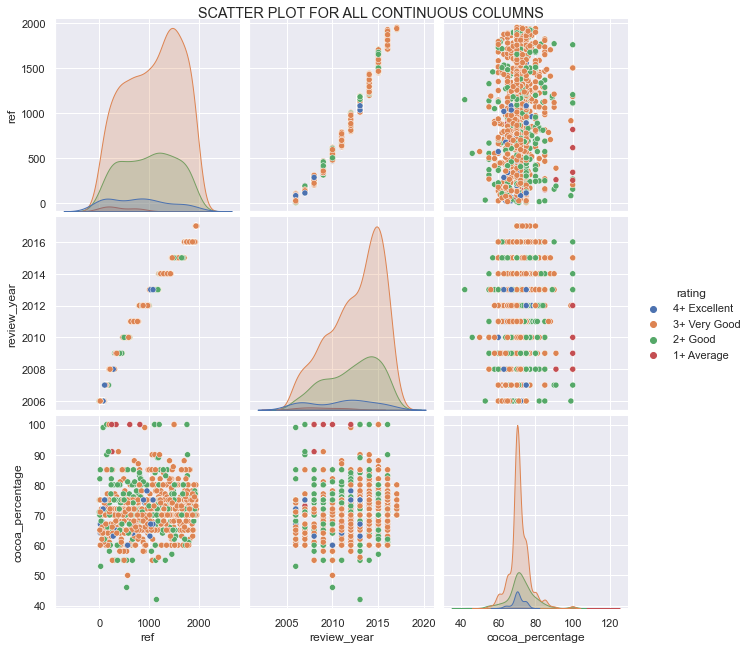

In [82]:

sns.set(font_scale=1)


g=sns.pairplot(data=chocs, height=3, hue='rating')


g.fig.suptitle("SCATTER PLOT FOR ALL CONTINUOUS COLUMNS", y=1)
plt.savefig('ScatterPlot')
plt.show()


### Encoding of Categorical Columns:

    All the categorical columns were vectorized using two methods:
        * One hot encoding using pd.get_dummies() - company, company location, review_year
        * Vectorization using TfidVectorizer from sklearn's feature_extraction.text- 
          specific_bean_origin, bean_type, broad_bean_origin
        

In [83]:
chocs_v=chocs.copy(deep=True) #making a copy of the dataframe

#chocs_vectorized WILL HAVE THE VECTORS FOR ALL COLUMNS


In [84]:
#chocs_vectorized=pd.get_dummies(chocs_vectorized, columns=['company_location','specific_bean_origin','bean_type','broad_bean_origin'],drop_first=True)


In [85]:
chocs_v

,company,specific_bean_origin,ref,review_year,cocoa_percentage,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,64.0,France,4+ Excellent,"Criollo,Trinitario",Madagascar
1,Original Beans (Felchlin),Grand Cru,1442,2014,80.0,Switzerland,3+ Very Good,Blend,Unknown
2,Potomac,Upala,647,2011,70.0,U.S.A.,3+ Very Good,Matina,Costa Rica
3,Middlebury,Cacao Bisiesto,1538,2015,70.0,U.S.A.,3+ Very Good,Unknown,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65.0,Colombia,3+ Very Good,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70.0,U.S.A.,3+ Very Good,Unknown,Ecuador
1496,Zotter,Indianer,883,2012,58.0,Austria,3+ Very Good,Unknown,Unknown
1497,Guido Castagna,Blend,355,2009,64.0,Italy,3+ Very Good,Unknown,"Ecuador,Trinidad and Tobago,Venezuela"
1498,Willie's Cacao,Hacienda Blend,593,2010,72.0,U.K.,3+ Very Good,Unknown,Venezuela


## The columns company, company_location and review_year are one hot encoded

### Encoding Col: company 


In [86]:

#using pd.get_dummies to create a one hot encoded matrix

dummies = pd.get_dummies(chocs['company'])


#Adding the variable to the column names so I can keep track of which original variable it came from
dummies.columns = ['company_' + k for k in dummies.columns.values]

chocs_v=pd.concat([chocs_v, dummies], axis=1)

#dropping the original column 
del chocs_v['company']

chocs_v.head()



,specific_bean_origin,ref,review_year,cocoa_percentage,company_location,rating,bean_type,broad_bean_origin,company_A. Morin,company_AMMA,...,company_Xocolla,company_Zak's,company_Zart Pralinen,company_Zokoko,company_Zotter,company_hello cocoa,company_hexx,company_iQ Chocolate,company_organicfair,company_twenty-four blackbirds
0,Manjari,129,2007,64.0,France,4+ Excellent,"Criollo,Trinitario",Madagascar,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Grand Cru,1442,2014,80.0,Switzerland,3+ Very Good,Blend,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Upala,647,2011,70.0,U.S.A.,3+ Very Good,Matina,Costa Rica,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cacao Bisiesto,1538,2015,70.0,U.S.A.,3+ Very Good,Unknown,Nicaragua,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cesar,1888,2016,65.0,Colombia,3+ Very Good,CCN51,Colombia,0,0,...,0,0,0,0,0,0,0,0,0,0


### Encoding Col:  company_location


In [87]:
#using pd.get_dummies to create a one hot encoded matrix
dummies = pd.get_dummies(chocs['company_location'])


#Adding the variable to the column names so I can keep track of which original variable it came from
dummies.columns = ['company_location_' + k for k in dummies.columns.values]

chocs_v=pd.concat([chocs_v, dummies], axis=1)

#dropping the original column 
del chocs_v['company_location']

chocs_v.head()


,specific_bean_origin,ref,review_year,cocoa_percentage,rating,bean_type,broad_bean_origin,company_A. Morin,company_AMMA,company_Acalli,...,company_location_South Korea,company_location_Spain,company_location_St. Lucia,company_location_Suriname,company_location_Sweden,company_location_Switzerland,company_location_U.K.,company_location_U.S.A.,company_location_Venezuela,company_location_Vietnam
0,Manjari,129,2007,64.0,4+ Excellent,"Criollo,Trinitario",Madagascar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Grand Cru,1442,2014,80.0,3+ Very Good,Blend,Unknown,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Upala,647,2011,70.0,3+ Very Good,Matina,Costa Rica,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Cacao Bisiesto,1538,2015,70.0,3+ Very Good,Unknown,Nicaragua,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Cesar,1888,2016,65.0,3+ Very Good,CCN51,Colombia,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Encoding Col:  review_year


In [88]:
chocs_v[["review_year"]] = chocs_v[["review_year"]].astype("string")


#using pd.get_dummies to create a one hot encoded matrix
dummies = pd.get_dummies(chocs_v['review_year'])

#Adding the variable to the column names so I can keep track of which original variable it came from
dummies.columns = ['review_year_' + k for k in dummies.columns.values]

chocs_v = pd.concat([chocs_v, dummies], axis=1)

#dropping the original column 
del chocs_v['review_year']

chocs_v.head()

,specific_bean_origin,ref,cocoa_percentage,rating,bean_type,broad_bean_origin,company_A. Morin,company_AMMA,company_Acalli,company_Adi,...,review_year_2008,review_year_2009,review_year_2010,review_year_2011,review_year_2012,review_year_2013,review_year_2014,review_year_2015,review_year_2016,review_year_2017
0,Manjari,129,64.0,4+ Excellent,"Criollo,Trinitario",Madagascar,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Grand Cru,1442,80.0,3+ Very Good,Blend,Unknown,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Upala,647,70.0,3+ Very Good,Matina,Costa Rica,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Cacao Bisiesto,1538,70.0,3+ Very Good,Unknown,Nicaragua,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Cesar,1888,65.0,3+ Very Good,CCN51,Colombia,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### The columns specific_bean_origin, bean_type and broad_bean_origin are vectorized using TfidfVectorizer

### Encoding Col: specific_bean_origin


In [89]:
#chocs_vectorized.drop(['specific_bean_origin'],axis=1, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1,2))

#fitting to the training data
tf.fit(chocs_v['specific_bean_origin'])

#transforming on both data set
chocs_v_transformed = tf.transform(chocs_v['specific_bean_origin'])

#converting to a dataframe so we can see the column names easier later
chocs_v_transformed= pd.DataFrame(data = chocs_v_transformed.todense(), 
                              index = chocs_v.index.values, 
                              columns = ["specific_bean_origin_" + k for k in tf.vocabulary_] )

#appending back to the original data
chocs_v=pd.concat([chocs_v, chocs_v_transformed],axis=1)

del chocs_v['specific_bean_origin']

chocs_v.head()





,ref,cocoa_percentage,rating,bean_type,broad_bean_origin,company_A. Morin,company_AMMA,company_Acalli,company_Adi,company_Aequare (Gianduja),...,specific_bean_origin_colorados,specific_bean_origin_ecuador los,specific_bean_origin_los colorados,specific_bean_origin_montubia,specific_bean_origin_maranura,specific_bean_origin_silvestre,specific_bean_origin_nine,specific_bean_origin_indianer,specific_bean_origin_pepiniere,specific_bean_origin_pepiniere single
0,129,64.0,4+ Excellent,"Criollo,Trinitario",Madagascar,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1442,80.0,3+ Very Good,Blend,Unknown,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,647,70.0,3+ Very Good,Matina,Costa Rica,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1538,70.0,3+ Very Good,Unknown,Nicaragua,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1888,65.0,3+ Very Good,CCN51,Colombia,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
chocs_v.shape

(1500, 1601)

### Encoding Col: bean_type


In [91]:

tf = TfidfVectorizer(ngram_range=(1,2))

#fitting to the training data
tf.fit(chocs_v['bean_type'])

#transforming on both data set
chocs_v_transformed = tf.transform(chocs_v['bean_type'])

#converting to a dataframe so we can see the column names easier later
chocs_v_transformed= pd.DataFrame(data = chocs_v_transformed.todense(), 
                              index = chocs_v.index.values, 
                              columns = ["bean_type_" + k for k in tf.vocabulary_] )

#appending back to the original data
chocs_v=pd.concat([chocs_v, chocs_v_transformed],axis=1)

del chocs_v['bean_type']

chocs_v.head()


,ref,cocoa_percentage,rating,broad_bean_origin,company_A. Morin,company_AMMA,company_Acalli,company_Adi,company_Aequare (Gianduja),company_Ah Cacao,...,bean_type_tcga,bean_type_tcga trinitario,bean_type_forastero trinitario,bean_type_nacional trinitario,bean_type_scavina,bean_type_scavina trinitario,bean_type_77,bean_type_ocumare 77,bean_type_catongo,bean_type_catongo forastero
0,129,64.0,4+ Excellent,Madagascar,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.394439,0.0,0.0
1,1442,80.0,3+ Very Good,Unknown,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,647,70.0,3+ Very Good,Costa Rica,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,1538,70.0,3+ Very Good,Nicaragua,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0
4,1888,65.0,3+ Very Good,Colombia,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Encoding Col: broad_bean_origin


In [92]:

tf = TfidfVectorizer(ngram_range=(1,2))

#fitting to the training data
tf.fit(chocs_v['broad_bean_origin'])

#transforming on both data set
chocs_v_transformed = tf.transform(chocs_v['broad_bean_origin'])

#converting to a dataframe so we can see the column names easier later
chocs_v_transformed= pd.DataFrame(data = chocs_v_transformed.todense(), 
                              index = chocs_v.index.values, 
                              columns = ["broad_bean_origin_" + k for k in tf.vocabulary_] )

#appending back to the original data
chocs_v=pd.concat([chocs_v, chocs_v_transformed],axis=1)

del chocs_v['broad_bean_origin']

chocs_v.head()


,ref,cocoa_percentage,rating,company_A. Morin,company_AMMA,company_Acalli,company_Adi,company_Aequare (Gianduja),company_Ah Cacao,company_Akesson's (Pralus),...,broad_bean_origin_west,broad_bean_origin_west africa,broad_bean_origin_republic ecuador,broad_bean_origin_nigeria,broad_bean_origin_republic peru,broad_bean_origin_liberia,broad_bean_origin_ghana venezuela,broad_bean_origin_ecuador nicaragua,broad_bean_origin_nicaragua peru,broad_bean_origin_burma
0,129,64.0,4+ Excellent,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1442,80.0,3+ Very Good,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,647,70.0,3+ Very Good,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1538,70.0,3+ Very Good,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1888,65.0,3+ Very Good,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalizing columns cocoa_percentage and ref

Both the columns are standardized and normalized using StandardScalar and MinMaxScalar to normalize the influence of these column entries on the algorithms.
    

In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


sc.fit(chocs_v['cocoa_percentage'].values.reshape(-1, 1))

chocs_v['cocoa_percentage'] = sc.transform(chocs_v['cocoa_percentage'].values.reshape(-1, 1))


sc.fit(chocs_v['ref'].values.reshape(-1, 1))

chocs_v['ref'] = sc.transform(chocs_v['ref'].values.reshape(-1, 1))





from sklearn.preprocessing import MinMaxScaler


chocs_v['cocoa_percentage']=MinMaxScaler().fit(chocs_v['cocoa_percentage'].values.reshape(-1, 1)).transform(chocs_v['cocoa_percentage'].values.reshape(-1, 1))   


chocs_v['ref']=MinMaxScaler().fit(chocs_v['ref'].values.reshape(-1, 1)).transform(chocs_v['ref'].values.reshape(-1, 1))   



chocs_v.head()


,ref,cocoa_percentage,rating,company_A. Morin,company_AMMA,company_Acalli,company_Adi,company_Aequare (Gianduja),company_Ah Cacao,company_Akesson's (Pralus),...,broad_bean_origin_west,broad_bean_origin_west africa,broad_bean_origin_republic ecuador,broad_bean_origin_nigeria,broad_bean_origin_republic peru,broad_bean_origin_liberia,broad_bean_origin_ghana venezuela,broad_bean_origin_ecuador nicaragua,broad_bean_origin_nicaragua peru,broad_bean_origin_burma
0,0.063688,0.379310,4+ Excellent,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.738059,0.655172,3+ Very Good,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.329738,0.482759,3+ Very Good,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.787365,0.482759,3+ Very Good,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967129,0.396552,3+ Very Good,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:

chocs_v.shape

(1500, 1785)

### Spliting the Encoded Data to get target values

In [95]:

from sklearn import preprocessing


chocs_r=chocs_v.copy(deep=True)
y = chocs_v['rating'].values

print(np.unique(y))



chocs_v.drop(['rating'],axis=1, inplace=True)

X=chocs_v.values



['1+ Average' '2+ Good' '3+ Very Good' '4+ Excellent']


In [96]:
X.shape


(1500, 1784)

# Task 2: Formulate the problem as a machine learning task

<blockquote> 
<li>The problem is best framed as a 4-class, single-label classification.
        
<li>It predicts whether a chocolate bar will be in one of four classes—
        { 4+ Excellent, 3+ Very Good, 2+ Good, 1+ Average }
</blockquote>    

Note:
    We initially considered using regression for this problem. 
    However, since confusion matrix can be printed for classifaction results, classification was chosen.

# Task 3: Select Three Learning Algorithms:

<blockquote>The three learning algorithms chosen along with hyperparameters are:<ol><li>SVM<ul><li>C: Regularization Parameter (1)</li><li>gamma: Kernel Coefficient (1)</li><li>kernel: Type of Kernel ('rbf','poly')</li><li>Models<ul>Model1A: SVC(C=1, class_weight='balanced', gamma=1, kernel='poly')</ul><ul>Model1B: SVC(C=1, class_weight='balanced', gamma=1, kernel='rbf')</ul></li></ul></li><li>RANDOM FOREST<ul><li>n_estimators: No. of Trees in the Forest (500)</li><li>max_depth: Maximum Depth of the Tree (10,11)</li><li>min_weight_fraction: Min. value of weight (0)</li><li>Models:<ul>Model 2A:RandomForestClassifier(class_weight='balanced', max_depth=10, min_weight_fraction_leaf=0, n_estimators=500)</ul><ul>Model 2B: RandomForestClassifier(class_weight='balanced', max_depth=11, min_weight_fraction_leaf=0, n_estimators=500)</ul></li></ul></li><li>KNN<ul><li>leaf_size: Leaf Size Passed (5,7)</li><li>n_neighbors: No. of Neighbors</li><li>weights: Weight Function ('distance')</li><li>Model:</li><ul>Model 3A: KNeighborsClassifier(leaf_size=5, weights='distance')</ul><ul>Model 3B: KNeighborsClassifier(leaf_size=7, weights='distance')</ul></ul></li></ol>
</blockquote>



# Task 4: Perform Data Partitioning.
<blockquote>Split the data into training data and test data. The training data will be used for model development, with the test data for performance evaluation.</blockquote>

In [97]:
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, classification_report




In [98]:
X.shape

(1500, 1784)

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=3)

#### Printing the Test Data and Training Data:

In [100]:
print(np.unique(y_train))


['1+ Average' '2+ Good' '3+ Very Good' '4+ Excellent']


In [101]:
print(f'X_train: \n{X_train} \nShape: {X_train.shape}')

X_train: 
[[0.90549563 0.70689655 0.         ... 0.         0.         0.        ]
 [0.54648177 0.22413793 0.         ... 0.         0.         0.        ]
 [0.74422188 0.68965517 0.         ... 0.         0.         0.        ]
 ...
 [0.98356446 0.48275862 0.         ... 0.         0.         0.        ]
 [0.8079096  0.48275862 0.         ... 0.         0.         0.        ]
 [0.42116076 0.48275862 0.         ... 0.         0.         0.        ]] 
Shape: (1050, 1784)


In [102]:
print(f'\n\nX_test: \n{X_test} \nShape: {X_test.shape}')



X_test: 
[[0.21468927 0.56896552 0.         ... 0.         0.         0.        ]
 [0.21006677 0.48275862 0.         ... 0.         0.         0.        ]
 [0.87673344 0.56896552 0.         ... 0.         0.         0.        ]
 ...
 [0.35747304 0.5862069  0.         ... 0.         0.         0.        ]
 [0.72008218 0.68965517 0.         ... 0.         0.         0.        ]
 [0.63379558 0.62068966 0.         ... 0.         0.         0.        ]] 
Shape: (450, 1784)


In [103]:
print(f'\n\ny_train: \n{y_train} \nShape: {y_train.shape}')



y_train: 
['3+ Very Good' '2+ Good' '3+ Very Good' ... '3+ Very Good' '3+ Very Good'
 '2+ Good'] 
Shape: (1050,)


In [104]:
print(f'\n\ny_test: \n{y_test} \nShape: {y_test.shape}')



y_test: 
['3+ Very Good' '3+ Very Good' '3+ Very Good' '3+ Very Good'
 '3+ Very Good' '3+ Very Good' '2+ Good' '2+ Good' '3+ Very Good'
 '3+ Very Good' '3+ Very Good' '3+ Very Good' '3+ Very Good'
 '3+ Very Good' '4+ Excellent' '3+ Very Good' '3+ Very Good'
 '3+ Very Good' '3+ Very Good' '3+ Very Good' '3+ Very Good' '2+ Good'
 '2+ Good' '3+ Very Good' '3+ Very Good' '3+ Very Good' '3+ Very Good'
 '2+ Good' '2+ Good' '3+ Very Good' '3+ Very Good' '3+ Very Good'
 '3+ Very Good' '3+ Very Good' '3+ Very Good' '3+ Very Good'
 '3+ Very Good' '2+ Good' '2+ Good' '2+ Good' '3+ Very Good'
 '3+ Very Good' '2+ Good' '2+ Good' '3+ Very Good' '1+ Average'
 '3+ Very Good' '4+ Excellent' '2+ Good' '3+ Very Good' '3+ Very Good'
 '3+ Very Good' '2+ Good' '3+ Very Good' '2+ Good' '2+ Good'
 '3+ Very Good' '2+ Good' '2+ Good' '4+ Excellent' '3+ Very Good'
 '3+ Very Good' '3+ Very Good' '2+ Good' '3+ Very Good' '3+ Very Good'
 '3+ Very Good' '3+ Very Good' '3+ Very Good' '3+ Very Good'
 '3+ Very Good' 

# Task 5: Perform Model Development: 
# Model Performance will be tuned for f1_score (weighted) in all models

    * Considering the data is highly imbalanced with majority of chocolate bars having a rating of: 
        - "3+ Very Good" (69.1%) or 
        - "2+ Good" (24.3%) 
      if the model is optimized for accuracy the model might end up categorizing every bar into category "3+ Very Good".

    * Since f1_score (weighted) calculates the f1_score for each class independently but when it adds them together uses a weight that depends on the number of true labels of each class thus is is chosen.
    
    * F1(class1) x Weight(1) + F1(class2) x Weight(2) + ... + F1(classN) x Weight(N) = F1_Score(weighted)

## MODEL 1 : SUPPORT VECTOR MACHINE (SVM)

Chosen because it is known to be effective on high dimensionality data

In [105]:
from sklearn import svm

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



print(' '*35+'  SVM CLASSIFIER ' +' '*35)

#Performing hyperparameter tuning 


# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf','poly']} 

svc = svm.SVC(class_weight='balanced')  # because of imbalanced classes

grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3, scoring='f1_weighted', cv=3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)






                                     SVM CLASSIFIER                                    
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.099, total=   3.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.097, total=   3.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.097, total=   3.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.613, total=   2.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.620, total=   2.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.607, total=   2.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.111, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.116, total=   3.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.099, total=   3.3s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.4min finished


[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.507, total=   3.1s


GridSearchCV(cv=3, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['rbf', 'poly']},
             scoring='f1_weighted', verbose=3)

In [106]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print('\n\nEXPANDED HYPERPARAMETERS:\n')

print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'poly'}


EXPANDED HYPERPARAMETERS:

SVC(C=1, class_weight='balanced', gamma=1, kernel='poly')


## n-Fold Cross Validation SVM for Model 1A and Model 1B
<blockquote>The dataset is split into k consecutive folds (without shuffling by default).Each fold is then used once as a validation set while the k - 1 remaining folds form the training set.</blockquote>

Model 1A: SVC(C=1, class_weight='balanced', gamma=1, kernel='poly')

Model 1B: SVC(C=1, class_weight='balanced', gamma=1, kernel='rbf')



In [107]:
x=1




def tune_SVM(svc):

    performance =[]


    for n in range(3,6):
        kfCV=KFold(n_splits=n)
        p=[]
        fold=1
        print(f'\n\n================================== n is {n} ==========================================')

        for tr, vl in kfCV.split(X_train):

            

            X_trData=X_train[tr]
            y_trData=y_train[tr]

            X_vlData=X_train[vl]
            y_vlData=y_train[vl]

            model1=svc.fit(X_trData, y_trData)


            y_pred=model1.predict(X_vlData)


            #ac=accuracy_score(y_vlData, y_pred)
            #ac=roc_auc_score(y_vlData, y_pred, multi_class='ovr')
            ac=f1_score(y_vlData, y_pred, average='weighted')

            print(f'Fold {fold} F1 Weighted Score: {ac}')
            p.append(ac)
            fold=fold+1

        print(f'\nF1-Score (Weighted) Performance of {n}-fold validation is {np.mean(p)}')
        performance.append(np.mean(p))

    print(f'\n\nOVERALL F1-WEIGHTED PERFORMANCE OF SVM IS {np.mean(performance)}')

    global x
    model_name='SVM '+str(x)
   
    L.append(model_name)
    P.append(np.mean(performance))
    x=x+1

print(' '*35+'  SVM CLASSIFIER: MODEL 2 A ' +' '*35)

svc=grid.best_estimator_

L=[]
P=[]

tune_SVM(svc)

print('\n\n')

print(' '*35+'  SVM CLASSIFIER: MODEL 2 B ' +' '*35)


svc=svm.SVC(C=1, class_weight='balanced', gamma=1, kernel='rbf')


tune_SVM(svc)







                                     SVM CLASSIFIER: MODEL 2 A                                    


================================== n is 3 ==========================================
Fold 1 F1 Weighted Score: 0.6313807724924833
Fold 2 F1 Weighted Score: 0.6140812348331145
Fold 3 F1 Weighted Score: 0.6161339339743158

F1-Score (Weighted) Performance of 3-fold validation is 0.6205319804333045


================================== n is 4 ==========================================
Fold 1 F1 Weighted Score: 0.6318841679072282
Fold 2 F1 Weighted Score: 0.5975832909210327
Fold 3 F1 Weighted Score: 0.6316031223337657
Fold 4 F1 Weighted Score: 0.6082499015323443

F1-Score (Weighted) Performance of 4-fold validation is 0.6173301206735927


================================== n is 5 ==========================================
Fold 1 F1 Weighted Score: 0.6709479026720406
Fold 2 F1 Weighted Score: 0.5701314661626959
Fold 3 F1 Weighted Score: 0.6145200043032861
Fold 4 F1 Weighted Score: 0.6437384837

In [108]:
svc=grid.best_estimator_

model1=svc.fit(X_train, y_train)
y_pred=model1.predict(X_test)

cm1=confusion_matrix(y_test, y_pred)


ac1=accuracy_score(y_test, y_pred)

cr1=classification_report(y_test, y_pred, zero_division=0,output_dict=True)


## MODEL 2 : RANDOM FOREST 

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(class_weight='balanced')

# Parameter for performing hyper tuning
parameters = {'max_depth': [9,10], 'n_estimators':[500], 'min_weight_fraction_leaf': [0]}

random_forest_classifier = GridSearchCV(rfc, parameters, cv = 3,scoring="f1_weighted", verbose=3)

random_forest_classifier.fit(X_train, y_train)
print(random_forest_classifier.best_params_)
print(random_forest_classifier.best_score_)



Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] max_depth=9, min_weight_fraction_leaf=0, n_estimators=500 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=9, min_weight_fraction_leaf=0, n_estimators=500, score=0.606, total=   2.5s
[CV] max_depth=9, min_weight_fraction_leaf=0, n_estimators=500 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  max_depth=9, min_weight_fraction_leaf=0, n_estimators=500, score=0.603, total=   2.9s
[CV] max_depth=9, min_weight_fraction_leaf=0, n_estimators=500 .......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


[CV]  max_depth=9, min_weight_fraction_leaf=0, n_estimators=500, score=0.626, total=   2.9s
[CV] max_depth=10, min_weight_fraction_leaf=0, n_estimators=500 ......
[CV]  max_depth=10, min_weight_fraction_leaf=0, n_estimators=500, score=0.606, total=   1.7s
[CV] max_depth=10, min_weight_fraction_leaf=0, n_estimators=500 ......
[CV]  max_depth=10, min_weight_fraction_leaf=0, n_estimators=500, score=0.631, total=   2.0s
[CV] max_depth=10, min_weight_fraction_leaf=0, n_estimators=500 ......
[CV]  max_depth=10, min_weight_fraction_leaf=0, n_estimators=500, score=0.608, total=   2.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.2s finished


{'max_depth': 10, 'min_weight_fraction_leaf': 0, 'n_estimators': 500}
0.6148049430294079


In [110]:
print(random_forest_classifier.best_params_)

print('\n')

print(random_forest_classifier.best_params_.values())

print('\n\nEXPANDED HYPERPARAMETERS:\n')

print(random_forest_classifier.best_estimator_)    
    


{'max_depth': 10, 'min_weight_fraction_leaf': 0, 'n_estimators': 500}


dict_values([10, 0, 500])


EXPANDED HYPERPARAMETERS:

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_weight_fraction_leaf=0, n_estimators=500)


## n-Fold Cross Validation for Model 2A and Model 2B Random Forest Classifier 
<blockquote>The dataset is split into k consecutive folds (without shuffling by default). Each fold is then used once as a validation set while the k - 1 remaining folds form the training set.</blockquote>

Model 2A: RandomForestClassifier(class_weight='balanced', max_depth=9,min_weight_fraction_leaf=0, n_estimators=500)

Model 2B: RandomForestClassifier(class_weight='balanced', max_depth=11,min_weight_fraction_leaf=0, n_estimators=500)





In [111]:

x=1




def tune_random_forest(rfc):
    performance =[]

    for n in range(3,6):
        kfCV=KFold(n_splits=n)
        p=[]
        fold=1
        print(f'\n\n================================== n is {n} ==========================================')

        for tr, vl in kfCV.split(X_train):

            

            X_trData=X_train[tr]
            y_trData=y_train[tr]

            X_vlData=X_train[vl]
            y_vlData=y_train[vl]

            model2=rfc.fit(X_trData, y_trData)

            y_pred=model2.predict(X_vlData)

            
            ac=f1_score(y_vlData, y_pred, average='weighted')

            print(f'Fold {fold} F1 Weighted: {ac}')
            p.append(ac)
            fold=fold+1

        print(f'\nF1 Weighted Performance of {n}-fold validation is {np.mean(p)}')
        performance.append(np.mean(p))

    print(f'\n\nOVERALL F1 WEIGHTED PERFORMANCE OF RANDOM TREE IS {np.mean(performance)}')
    
    global x
    model_name='Random Forest '+str(x)


    
    L.append(model_name)
    P.append(np.mean(performance))
    x=x+1


print(' '*35+'  RANDOM TREE CLASSIFIER: MODEL 2 A ' +' '*35)

rfc=random_forest_classifier.best_estimator_

tune_random_forest(rfc)

print('\n\n')

print(' '*35+'  RANDOM TREE CLASSIFIER: MODEL 2 B ' +' '*35)


rfc=RandomForestClassifier(class_weight='balanced', max_depth=11,min_weight_fraction_leaf=0, n_estimators=500)

tune_random_forest(rfc)


                                     RANDOM TREE CLASSIFIER: MODEL 2 A                                    


================================== n is 3 ==========================================
Fold 1 F1 Weighted: 0.6253257729993451
Fold 2 F1 Weighted: 0.6171900140765744
Fold 3 F1 Weighted: 0.5971722270912455

F1 Weighted Performance of 3-fold validation is 0.6132293380557217


================================== n is 4 ==========================================
Fold 1 F1 Weighted: 0.6072476091565521
Fold 2 F1 Weighted: 0.5785564018961857
Fold 3 F1 Weighted: 0.6246567829985205
Fold 4 F1 Weighted: 0.6093505024802736

F1 Weighted Performance of 4-fold validation is 0.604952824132883


================================== n is 5 ==========================================
Fold 1 F1 Weighted: 0.6077801951963027
Fold 2 F1 Weighted: 0.5796492243780677
Fold 3 F1 Weighted: 0.5920050268290464
Fold 4 F1 Weighted: 0.6298432041006298
Fold 5 F1 Weighted: 0.5920704317763141

F1 Weighted Performance of 5

In [112]:
rfc=random_forest_classifier.best_estimator_

model2=rfc.fit(X_train, y_train)

y_pred=model2.predict(X_test)

cm2=confusion_matrix(y_test, y_pred)

ac2=accuracy_score(y_test, y_pred)

cr2=classification_report(y_test, y_pred, zero_division=0, output_dict=True)



## MODEL 3 : K NEAREST NEIGHBOR(KNN)

In [113]:
# Hyperparameter Tuning

from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'leaf_size':[5,10,20,30],
               'n_neighbors' : [3,5,7],
               'weights' : ['uniform','distance'],
                }

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 3, cv=3, scoring='f1_weighted')

g_res = gs.fit(X_train, y_train)



Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] leaf_size=5, n_neighbors=3, weights=uniform .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  leaf_size=5, n_neighbors=3, weights=uniform, score=0.621, total=   2.8s
[CV] leaf_size=5, n_neighbors=3, weights=uniform .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  leaf_size=5, n_neighbors=3, weights=uniform, score=0.636, total=   3.0s
[CV] leaf_size=5, n_neighbors=3, weights=uniform .....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV]  leaf_size=5, n_neighbors=3, weights=uniform, score=0.605, total=   2.7s
[CV] leaf_size=5, n_neighbors=3, weights=distance ....................
[CV]  leaf_size=5, n_neighbors=3, weights=distance, score=0.617, total=   3.0s
[CV] leaf_size=5, n_neighbors=3, weights=distance ....................
[CV]  leaf_size=5, n_neighbors=3, weights=distance, score=0.630, total=   2.6s
[CV] leaf_size=5, n_neighbors=3, weights=distance ....................
[CV]  leaf_size=5, n_neighbors=3, weights=distance, score=0.607, total=   2.8s
[CV] leaf_size=5, n_neighbors=5, weights=uniform .....................
[CV]  leaf_size=5, n_neighbors=5, weights=uniform, score=0.618, total=   3.0s
[CV] leaf_size=5, n_neighbors=5, weights=uniform .....................
[CV]  leaf_size=5, n_neighbors=5, weights=uniform, score=0.619, total=   3.3s
[CV] leaf_size=5, n_neighbors=5, weights=uniform .....................
[CV]  leaf_size=5, n_neighbors=5, weights=uniform, score=0.630, total=   3.3s
[CV] leaf_size=5, n_neigh

[CV]  leaf_size=30, n_neighbors=3, weights=distance, score=0.617, total=   1.2s
[CV] leaf_size=30, n_neighbors=3, weights=distance ...................
[CV]  leaf_size=30, n_neighbors=3, weights=distance, score=0.630, total=   1.1s
[CV] leaf_size=30, n_neighbors=3, weights=distance ...................
[CV]  leaf_size=30, n_neighbors=3, weights=distance, score=0.607, total=   1.2s
[CV] leaf_size=30, n_neighbors=5, weights=uniform ....................
[CV]  leaf_size=30, n_neighbors=5, weights=uniform, score=0.618, total=   1.3s
[CV] leaf_size=30, n_neighbors=5, weights=uniform ....................
[CV]  leaf_size=30, n_neighbors=5, weights=uniform, score=0.619, total=   1.1s
[CV] leaf_size=30, n_neighbors=5, weights=uniform ....................
[CV]  leaf_size=30, n_neighbors=5, weights=uniform, score=0.630, total=   1.3s
[CV] leaf_size=30, n_neighbors=5, weights=distance ...................
[CV]  leaf_size=30, n_neighbors=5, weights=distance, score=0.633, total=   1.4s
[CV] leaf_size=30

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  2.3min finished


In [114]:
print(g_res.best_score_)
# get the hyperparameters with the best score
print('\n')
print(g_res.best_params_)
print('\n\nEXPANDED HYPERPARAMETERS:\n')
print(g_res.best_estimator_)



0.6282739920714581


{'leaf_size': 5, 'n_neighbors': 5, 'weights': 'distance'}


EXPANDED HYPERPARAMETERS:

KNeighborsClassifier(leaf_size=5, weights='distance')


## n-Fold Cross Validation KNN 
<blockquote>The dataset is split into k consecutive folds (without shuffling by default).Each fold is then used once as a validation set while the k - 1 remaining folds form the training set.</blockquote>

    Model 3A: KNeighborsClassifier(leaf_size=5, weights='distance')
    Model 3B: knn=KNeighborsClassifier(leaf_size=7, weights='distance')



In [115]:
'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
X=mms.fit_transform(X)


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=1)

'''



x=1

def tune_KNN(knn):
    
    performance =[]

    for n in range(3,6):
        kfCV=KFold(n_splits=n)
        p=[]
        fold=1
        print(f'\n\n================================== n is {n} ==========================================')

        for tr, vl in kfCV.split(X_train):

            
            X_trData=X_train[tr]
            y_trData=y_train[tr]

            X_vlData=X_train[vl]
            y_vlData=y_train[vl]

            model4=knn.fit(X_trData, y_trData)

            y_pred=model4.predict(X_vlData)


            ac=f1_score(y_vlData, y_pred, average='weighted')

            print(f'Fold {fold} F1 Weighted: {ac}')
            p.append(ac)
            fold=fold+1

        print(f'\nF1 Weighted Performance of {n}-fold validation is {np.mean(p)}')
        performance.append(np.mean(p))

    print(f'\n\nOVERALL F1 WEIGHTED PERFORMANCE OF RANDOM TREE IS {np.mean(performance)}')

    global x
    
    model_name='KNN '+str(x)        
    L.append(model_name)
    P.append(np.mean(performance))
    x=x+1

print(' '*40+'  KNN CLASSIFIER MODEL 3A ' +' '*40)

knn=g_res.best_estimator_
tune_KNN(knn)

print(' '*40+'  KNN CLASSIFIER MODEL 3B ' +' '*40)

knn=KNeighborsClassifier(leaf_size=7, weights='distance')

tune_KNN(knn)


                                          KNN CLASSIFIER MODEL 3A                                         


================================== n is 3 ==========================================
Fold 1 F1 Weighted: 0.6648317764107239
Fold 2 F1 Weighted: 0.6028530422032438
Fold 3 F1 Weighted: 0.6420610406324692

F1 Weighted Performance of 3-fold validation is 0.6365819530821456


================================== n is 4 ==========================================
Fold 1 F1 Weighted: 0.6260732829644474
Fold 2 F1 Weighted: 0.5922117529634569
Fold 3 F1 Weighted: 0.621513707933957
Fold 4 F1 Weighted: 0.6231536785317895

F1 Weighted Performance of 4-fold validation is 0.6157381055984127


================================== n is 5 ==========================================
Fold 1 F1 Weighted: 0.6348609474942625
Fold 2 F1 Weighted: 0.5987435456110155
Fold 3 F1 Weighted: 0.585201117216894
Fold 4 F1 Weighted: 0.6442021192698699
Fold 5 F1 Weighted: 0.5996986888178237

F1 Weighted Performance of 5-

In [116]:
knn=g_res.best_estimator_

model4=knn.fit(X_train, y_train)


y_pred=model4.predict(X_test)


cm4=confusion_matrix(y_test, y_pred)


ac4=accuracy_score(y_test, y_pred)


cr4=classification_report(y_test, y_pred, zero_division=0, output_dict=True)




### Comparing the performance of all the models

                 Performance_F1_Score_weighted
Model                                         
SVM 2                                 0.587215
Random Forest 2                       0.601965
Random Forest 1                       0.606151
SVM 1                                 0.616291
KNN 2                                 0.621136
KNN 1                                 0.621620


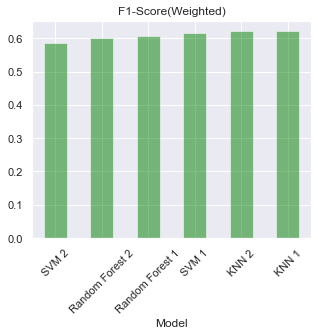

In [117]:
perf_dict={'Model':L,'Performance_F1_Score_weighted':P}

df=pd.DataFrame(perf_dict)

df.set_index('Model', inplace=True)
print(df.sort_values(by='Performance_F1_Score_weighted'))

df.sort_values(by='Performance_F1_Score_weighted').plot(kind='bar', rot=45, color='green', alpha=0.5, figsize=(5,4), legend=False)
plt.title('F1-Score(Weighted)')
plt.show()


In [118]:
df.sort_values(by='Performance_F1_Score_weighted')

,Performance_F1_Score_weighted
Model,
SVM 2,0.587215
Random Forest 2,0.601965
Random Forest 1,0.606151
SVM 1,0.616291
KNN 2,0.621136
KNN 1,0.621620


### Confusion Matrix of the Top Three Models 

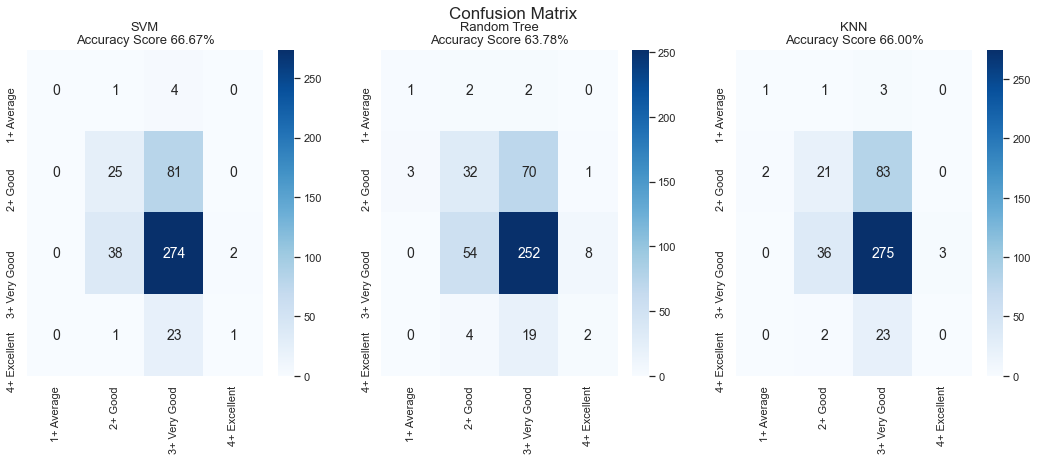

In [119]:
plt.figure(figsize=(18,6))
plt.suptitle("Confusion Matrix\n\n", fontsize=17)


plt.subplot(131)
plt.title(f'SVM\nAccuracy Score {ac1*100:.2f}%', fontsize=13)
sns.heatmap(cm1, annot=True, 
            cmap='Blues',
            annot_kws={"size": 14},
            fmt='g',
            xticklabels=model1.classes_, 
            yticklabels=model1.classes_)

plt.subplot(132)
plt.title(f'Random Tree\nAccuracy Score {ac2*100:.2f}%',fontsize=13)
sns.heatmap(cm2, 
            annot=True, 
            cmap='Blues',
            fmt='g',
            annot_kws={"size": 14},
            xticklabels=model2.classes_, 
            yticklabels=model2.classes_)


plt.subplot(133)
plt.title(f'KNN\nAccuracy Score {ac4*100:.2f}%',fontsize=13)
sns.heatmap(cm4, 
            annot=True, 
            cmap='Blues',
            fmt='g',
            annot_kws={"size": 14},
            xticklabels=model4.classes_, 
            yticklabels=model4.classes_)

plt.savefig('Confusion Matrix HeatMap')

plt.show()

#binary


## Pickling the Model 3A (KNN) as it had the Best Performance for (F1-Score(Weighted)):

In [120]:
#Pickling Best Performing Model M (For F1 Weighted Score - As The Class Distribution is Imbalanced)

 

import pickle


# save the model to disk

filename = 'model.pickle'

pickle.dump(model4, open(filename, 'wb'))


# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(X_test, y_test)

print (result)

 
#FOR LOADING THE MODEL AND PRINTING:
#result = loaded_model.predict(X_test)
#print (result)

0.66


## Task 6: Perform performance assessment
### Selected model M is KNN. Calculating the accuracy and the confusion matrix
    

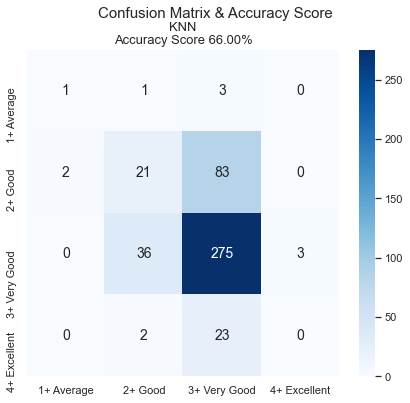

In [121]:

knn=g_res.best_estimator_

model4=knn.fit(X_train, y_train)


y_pred=model4.predict(X_test)


cm4=confusion_matrix(y_test, y_pred)


ac4=accuracy_score(y_test, y_pred)


cr4=classification_report(y_test, y_pred, zero_division=0,output_dict=True)

plt.figure(figsize=(7,6))
plt.suptitle("Confusion Matrix & Accuracy Score", fontsize=15)

plt.subplot(111)
plt.title(f'KNN\nAccuracy Score {ac4*100:.2f}%',fontsize=13)
sns.heatmap(cm4, 
            annot=True, 
            cmap='Blues',
            fmt='g',
            annot_kws={"size": 14},
            xticklabels=model4.classes_, 
            yticklabels=model4.classes_)

plt.savefig('Confusion Matrix HeatMap')

plt.show()





In [122]:
knn_class_rep=pd.DataFrame(cr4)

knn_class_rep

,1+ Average,2+ Good,3+ Very Good,4+ Excellent,accuracy,macro avg,weighted avg
precision,0.333333,0.350000,0.716146,0.0,0.66,0.349870,0.585859
recall,0.200000,0.198113,0.875796,0.0,0.66,0.318477,0.660000
f1-score,0.250000,0.253012,0.787966,0.0,0.66,0.322744,0.612201
support,5.000000,106.000000,314.000000,25.0,0.66,450.000000,450.000000


In [123]:
X_test_df=pd.DataFrame(X_test)


predictions=pd.DataFrame(y_pred)

X_test_df=pd.concat([X_test_df,predictions],axis=1)


np.array(X_test_df)


array([[0.21468926553672313, 0.5689655172413793, 0.0, ..., 0.0, 0.0,
        '3+ Very Good'],
       [0.21006676938880325, 0.48275862068965525, 0.0, ..., 0.0, 0.0,
        '2+ Good'],
       [0.8767334360554699, 0.5689655172413793, 0.0, ..., 0.0, 0.0,
        '3+ Very Good'],
       ...,
       [0.3574730354391371, 0.5862068965517242, 0.0, ..., 0.0, 0.0,
        '3+ Very Good'],
       [0.7200821777092964, 0.6896551724137931, 0.0, ..., 0.0, 0.0,
        '3+ Very Good'],
       [0.6337955829481253, 0.6206896551724139, 0.0, ..., 0.0, 0.0,
        '3+ Very Good']], dtype=object)

# Task 7: Other analysis 
    

### (i) Identifying the most predictive attributes.


In [124]:
model2.feature_importances_

array([5.85037120e-02, 5.02097068e-02, 6.23035956e-04, ...,
       4.50699490e-04, 3.38407497e-05, 0.00000000e+00])

In [125]:
features=chocs_v.columns
importances=model2.feature_importances_
feat_imp_dict={'Features':features,'Importance':importances}
df_feat_imp=pd.DataFrame(feat_imp_dict)

In [126]:
df_feat_imp.sort_values(by='Importance', ascending=False).head(10)

#THE ORDER OF FEATURE IMPORTANCES IS:
#REF and COCOA_PERCENTAGE HAVE HIGH IMPORTANCE

,Features,Importance
0,ref,0.058504
1,cocoa_percentage,0.050210
1778,broad_bean_origin_republic peru,0.037122
1227,specific_bean_origin_tangara,0.025087
394,company_location_Belgium,0.025080
1651,bean_type_catongo,0.020569
446,review_year_2007,0.018676
450,review_year_2011,0.017161
1631,bean_type_criollo porcelana,0.017099
966,specific_bean_origin_samar,0.016173


In [127]:
chocs.groupby('rating')[['cocoa_percentage','ref']].mean()

,cocoa_percentage,ref
rating,,
1+ Average,80.928571,391.571429
2+ Good,72.424658,998.126027
3+ Very Good,71.216972,1078.214079
4+ Excellent,70.547619,802.571429


In [128]:
#FEATURES THAT HAVE ZERO IMPORTANCE AS PER RANDOM FOREST MODEL 2A
df_feat_imp[df_feat_imp['Importance']==0].count()

df_feat_imp[df_feat_imp['Importance']==0]

,Features,Importance
5,company_Adi,0.0
7,company_Ah Cacao,0.0
26,company_Baravelli's,0.0
28,company_Beau Cacao,0.0
46,company_Britarev,0.0
47,company_Bronx Grrl Chocolate,0.0
65,company_Carlotta Chocolat,0.0
68,company_Cemoi,0.0
69,company_Chaleur B,0.0
70,company_Charm School,0.0


### (ii) Map out the chocolate rating geographically on a map

In [129]:
s=chocolate.groupby(['company_location'])['rating'].mean()

list_of_countries=list(s)

import chart_studio.plotly as py
import plotly.graph_objs as go

import pandas as pd

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)

#initializing the data variable
data = dict(type = 'choropleth',
            locations = s.index,
            locationmode = 'country names',
            colorscale= 'tropic',
            z=list_of_countries,
            colorbar = {'title':'Chocolate Ratings by Company Location', 'len':200,'lenmode':'pixels' })

#initializing the layout variable
layout = dict(geo = {'scope':'world'})

# Initializing the Figure object by passing data and layout as arguments.
col_map = go.Figure(data = [data],layout = layout)

#plotting the map
iplot(col_map)



In [130]:
# pip install chart_studio

In [131]:
# pip install plotly

In [132]:
chocolate_map=chocs.copy(deep=True)

def bbo_clean(text):
    split_string=text.split(',')
    txt=split_string[0]
    return txt

chocolate_map['broad_bean_origin']=chocolate_map['broad_bean_origin'].apply(bbo_clean)

chocolate_map['rating']=chocolate['rating']
chocolate_map.groupby('broad_bean_origin')['rating'].mean().sort_values()

broad_bean_origin
Puerto Rico              2.500000
West Africa              2.625000
Martinique               2.750000
Ivory Coast              2.800000
Uganda                   2.812500
El Salvador              2.875000
Sri Lanka                2.875000
Philippines              2.916667
Unknown                  2.967742
Carribean                2.968750
Liberia                  3.000000
Burma                    3.000000
Ghana                    3.032258
Mexico                   3.046296
Sao Tome and Principe    3.053571
Vanuatu                  3.100000
Fiji                     3.107143
Grenada                  3.116667
Ecuador                  3.122093
Samoa                    3.125000
Togo                     3.125000
India                    3.125000
Tanzania                 3.134615
Costa Rica               3.138889
Indonesia                3.150000
Congo                    3.150000
Hawaii                   3.154762
Africa                   3.166667
Jamaica                  3.166

In [133]:


#initializing the data variable
data = dict(type = 'choropleth',
            locations=chocolate_map['broad_bean_origin'],
            locationmode = 'country names',
            colorscale= 'Portland',
            z=chocolate_map['rating'],
            colorbar = {'title':'Rating', 'len':200,'lenmode':'pixels' })

#initializing the layout variable
layout = dict(geo = {'scope':'world'})

# Initializing the Figure object by passing data and layout as arguments.
col_map2 = go.Figure(data = [data],layout = layout)

#plotting the map
iplot(col_map2)


### (iii) Considering the problem as a regression problem

In [134]:
chocs_regr=chocs_r.copy(deep=True)

In [135]:
chocs_r['rating']=chocolate['rating']

In [136]:
chocs_r

,ref,cocoa_percentage,rating,company_A. Morin,company_AMMA,company_Acalli,company_Adi,company_Aequare (Gianduja),company_Ah Cacao,company_Akesson's (Pralus),...,broad_bean_origin_west,broad_bean_origin_west africa,broad_bean_origin_republic ecuador,broad_bean_origin_nigeria,broad_bean_origin_republic peru,broad_bean_origin_liberia,broad_bean_origin_ghana venezuela,broad_bean_origin_ecuador nicaragua,broad_bean_origin_nicaragua peru,broad_bean_origin_burma
0,0.063688,0.379310,4.00,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.738059,0.655172,3.25,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
2,0.329738,0.482759,3.50,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.787365,0.482759,3.50,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.967129,0.396552,3.50,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.392399,0.482759,3.25,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1496,0.450950,0.275862,3.50,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
1497,0.179764,0.379310,3.25,0,0,0,0,0,0,0,...,0.0,0.310182,0.310182,0.0,0.0,0.0,0.205983,0.0,0.0,0.0
1498,0.302003,0.517241,3.50,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


In [137]:
y = chocs_r['rating'].values
chocs_r.drop(['rating'],axis=1, inplace=True)
X=chocs_r.values
#chocs_regr['rating'].unique

In [138]:
X

array([[0.06368772, 0.37931034, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73805855, 0.65517241, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32973806, 0.48275862, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17976374, 0.37931034, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30200308, 0.51724138, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84694402, 0.48275862, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [139]:
y

array([4.  , 3.25, 3.5 , ..., 3.25, 3.5 , 2.75])

### Performing data partitioning

In [140]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=1)

In [141]:
#DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error 
import numpy as np 
L_r=[]
P_r=[]



### Model 1 Decision Tree Regressor

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import mean_squared_error 
import numpy as np 
dtr = tree.DecisionTreeRegressor()
from sklearn.metrics import mean_absolute_error
#PERFORMING HYPERPARAMETER TUNING

parameters={"max_depth" : [9]}

tuning_model1=GridSearchCV(dtr,parameters,scoring='neg_mean_absolute_error',refit=True)
tuning_model1.fit(X_train,y_train)

print(tuning_model1.best_params_)

key1r_list = list(tuning_model1.best_params_.values())

key1r_list[0]

{'max_depth': 9}


9

In [143]:
tuning_model1.best_score_

-0.3837958311038084

In [144]:
tuning_model1.best_estimator_

DecisionTreeRegressor(max_depth=9)

In [145]:
print(' '*35+'  DESCISION TREE REGRESSOR ' +' '*35)

d_tree=tree.DecisionTreeRegressor(max_depth=key1r_list[0]) #values specific for the training set obtained
# d_tree=tuning_model1.best_estimator_

performance_r =[]

for n in range(3,6):
    kfCV=KFold(n_splits=n)
    p_r=[]
    fold=1
    print(f'\n\n================================== n is {n} ==========================================')
        
    for tr, vl in kfCV.split(X_train):
        
        
        X_trData=X_train[tr]
        y_trData=y_train[tr]

        X_vlData=X_train[vl]
        y_vlData=y_train[vl]
        
        model1r=d_tree.fit(X_trData, y_trData)
        
        y_pred=model1r.predict(X_vlData)
        
        rmse=mean_absolute_error(y_vlData, y_pred)

        

        print(f'Fold {fold}MAE: {rmse}')
        fold=fold+1
        p_r.append(rmse)
    print(f'\nPerformance of {n}-fold validation is {np.mean(p_r)}')
    performance_r.append(np.mean(p_r))
    
    
print(f'\n\nOVERALL ERROR OF DECISION TREE REGRESSOR IS {np.mean(performance_r)}')



L_r.append('Decision Tree Regressor')
P_r.append(np.mean(performance_r))

y_pred=model1r.predict(X_test)



rmse1=mean_absolute_error(y_test, y_pred)
print(f'MAE DECISION TREE REGRESSOR: {rmse1}')






                                     DESCISION TREE REGRESSOR                                    


================================== n is 3 ==========================================
Fold 1MAE: 0.38693215661418234
Fold 2MAE: 0.38719535767110397
Fold 3MAE: 0.4076946916892198

Performance of 3-fold validation is 0.3939407353248354


================================== n is 4 ==========================================
Fold 1MAE: 0.371835498169863
Fold 2MAE: 0.3906318766404396
Fold 3MAE: 0.38251809349523763
Fold 4MAE: 0.40509627101887097

Performance of 4-fold validation is 0.3875204348311028


================================== n is 5 ==========================================
Fold 1MAE: 0.3618736586674471
Fold 2MAE: 0.382760575847731
Fold 3MAE: 0.38516531910237817
Fold 4MAE: 0.40038211098531007
Fold 5MAE: 0.39592385004611264

Performance of 5-fold validation is 0.3852211029297958


OVERALL ERROR OF DECISION TREE REGRESSOR IS 0.388894091028578
MAE DECISION TREE REGRESSOR: 0.3693613574981

### Model 2 Random Forest Regressor

In [146]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#PERFORMING HYPERPRAMETER TUNING
parameters={'n_estimators': [10,90,100], 
              'max_depth': [10, None]}
tuning_model2=GridSearchCV(rf,parameters,cv=3)
tuning_model2.fit(X_train,y_train)
print(tuning_model2.best_params_)
key2r_list = list(tuning_model2.best_params_.values())

print(key2r_list[0])
print(key2r_list[1])





{'max_depth': None, 'n_estimators': 100}
None
100


In [147]:
## print(' '*35+'  RANDOM FOREST REGRESSOR ' +' '*35)

r_f=RandomForestRegressor(max_depth=key2r_list[0],n_estimators=key2r_list[1],verbose=3) #values specific for the training set obtained

performance_r =[]

for n in range(3,6):
    kfCV=KFold(n_splits=n)
    p_r=[]
    fold=1
    print(f'\n\n================================== n is {n} ==========================================')
        
    for tr, vl in kfCV.split(X_train):
        
        
        X_trData=X_train[tr]
        y_trData=y_train[tr]

        X_vlData=X_train[vl]
        y_vlData=y_train[vl]
        
        model2r=r_f.fit(X_trData, y_trData)
        
        y_pred=model2r.predict(X_vlData)
        rmse=mean_absolute_error(y_vlData, y_pred)
        

        print(f'Fold {fold}MAE: {rmse}')
        fold=fold+1
        p_r.append(rmse)
    print(f'\nPerformance of {n}-fold validation is {np.mean(p_r)}')
    performance_r.append(np.mean(p_r))
    
    
print(f'\n\nOVERALL ERROR OF RANDOM FOREST REGRESSOR IS {np.mean(performance_r)}')



L_r.append('Random Forest Regressor')
P_r.append(np.mean(performance_r))

y_pred=model2r.predict(X_test)




rmse2=mean_absolute_error(y_test, y_pred)
print(f'MAE RANDOM FOREST REGRESSOR: {rmse2}')








================================== n is 3 ==========================================
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fold 2MAE: 0.3582943615257048
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fold 1MAE: 0.34631613756613755
building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fold 3MAE: 0.3536752988047808
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fold 1MAE: 0.33132276119402987
building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fold 4MAE: 0.3673383084577115
building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [148]:
print(tuning_model2.best_score_)

0.10550069754564073


### Model 3 Support Vector Regressor

In [149]:
from sklearn.svm import SVR

svr = SVR()
#PERFORMING HYPERPRAMETER TUNING
parameters={'C': [0.1,1,10]}
tuning_model3=GridSearchCV(svr,parameters)
tuning_model3.fit(X_train,y_train)
print(tuning_model3.best_params_)
key3r_list = list(tuning_model3.best_params_.values())

key3r_list[0]




{'C': 1}


1

In [150]:
print(' '*35+'  SVR ' +' '*35)

svr_R=SVR(C=key3r_list[0],verbose=3) #values specific for the training set obtained

performance_r =[]

for n in range(3,6):
    kfCV=KFold(n_splits=n)
    p_r=[]
    fold=1
    print(f'\n\n================================== n is {n} ==========================================')
        
    for tr, vl in kfCV.split(X_train):
        
        
        X_trData=X_train[tr]
        y_trData=y_train[tr]

        X_vlData=X_train[vl]
        y_vlData=y_train[vl]
        
        model3r=svr_R.fit(X_trData, y_trData)
        
        y_pred=model3r.predict(X_vlData)
        
        rmse=mean_absolute_error(y_vlData, y_pred)
        

        print(f'Fold {fold}MAE: {rmse}')
        fold=fold+1
        p_r.append(rmse)
    print(f'\nPerformance of {n}-fold validation is {np.mean(p_r)}')
    performance_r.append(np.mean(p_r))
    
    
print(f'\n\nOVERALL ERROR OF SVR IS {np.mean(performance_r)}')



L_r.append('support vector regression ')
P_r.append(np.mean(performance_r))

y_pred=model3r.predict(X_test)




rmse3=mean_absolute_error(y_test, y_pred)
print(f'MAE  support vector regression  REGRESSOR: {rmse3}')






                                     SVR                                    


================================== n is 3 ==========================================
[LibSVM]Fold 1MAE: 0.35698525867034875
[LibSVM]Fold 2MAE: 0.35776534015524086
[LibSVM]Fold 3MAE: 0.3758422788339556

Performance of 3-fold validation is 0.36353095921984835


================================== n is 4 ==========================================
[LibSVM]Fold 1MAE: 0.35637082700403355
[LibSVM]Fold 2MAE: 0.36899506510157265
[LibSVM]Fold 3MAE: 0.3551947015328971
[LibSVM]Fold 4MAE: 0.3803664990145155

Performance of 4-fold validation is 0.3652317731632547


================================== n is 5 ==========================================
[LibSVM]Fold 1MAE: 0.3396908663004642
[LibSVM]Fold 2MAE: 0.3718585140974661
[LibSVM]Fold 3MAE: 0.3429577677569495
[LibSVM]Fold 4MAE: 0.3804165666006081
[LibSVM]Fold 5MAE: 0.3845404899560308

Performance of 5-fold validation is 0.36389284094230373


OVERALL ERROR OF SVR IS 0.3642

### Comparing the performance of all the models

                            Performance
Model                                  
Random Forest Regressor        0.356847
support vector regression      0.364219
Decision Tree Regressor        0.388894


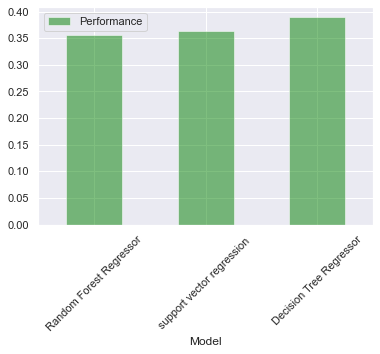

In [151]:
perf_dict={'Model':L_r,'Performance':P_r}

df=pd.DataFrame(perf_dict)

df.set_index('Model', inplace=True)
print(df.sort_values(by='Performance'))

df.sort_values(by='Performance').plot(kind='bar', rot=45, color='green', alpha=0.5)
plt.show()


In [152]:
df.sort_values(by='Performance')

,Performance
Model,
Random Forest Regressor,0.356847
support vector regression,0.364219
Decision Tree Regressor,0.388894


In [153]:
model2r.feature_importances_

array([1.20077947e-01, 1.06430782e-01, 6.96573164e-04, ...,
       7.89637588e-04, 1.90495446e-05, 0.00000000e+00])

In [154]:
features=chocs_r.columns

In [155]:
importances=model2r.feature_importances_

In [156]:
feat_imp_dict={'Features':features,'Importance':importances}

In [157]:

df_feat_imp=pd.DataFrame(feat_imp_dict)

In [158]:
df_feat_imp.sort_values(by='Importance', ascending=False).head(10)


,Features,Importance
0,ref,0.120078
1,cocoa_percentage,0.106431
210,company_Machu Picchu Trading Co.,0.019982
330,company_Soma,0.014705
1227,specific_bean_origin_tangara,0.014633
767,specific_bean_origin_principe,0.011209
693,specific_bean_origin_hilo,0.010587
442,company_location_U.S.A.,0.010487
258,company_Neuhaus (Callebaut),0.009461
1299,specific_bean_origin_palmira porcelana,0.008989
